<a href="https://colab.research.google.com/github/ArchitDhodi/Credit-Card-Default-Prediction-Classification/blob/main/Submission_of_Credit_Card_Default_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Archit Dhodi**


# **GitHub Link -**

[Github Link](https://github.com/ArchitDhodi/Credit-Card-Default-Prediction-Classification)

# **Problem Statement**


**Predicting whether a customer will default on his/her credit card. This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [2]:
# Load Dataset
!gdown https://drive.google.com/uc?id=15enZcGi-gSSX7lI5orKbOVEV5FxASD8d


Downloading...
From: https://drive.google.com/uc?id=15enZcGi-gSSX7lI5orKbOVEV5FxASD8d
To: /content/default of credit card clients.xls
100% 5.54M/5.54M [00:00<00:00, 22.6MB/s]


In [3]:
dataset = pd.read_excel('/content/default of credit card clients.xls', header = 1)

### Dataset First View

In [4]:
# Dataset First Look
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
lr = len(dataset.index)
lc = len(dataset.columns)
print("The number of rows is:-",lr)
print("The number of columns is:-",lc)

The number of rows is:- 30000
The number of columns is:- 25


### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset.drop_duplicates(inplace = True)
dataset.reset_index()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1,3,1,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29996,29997,150000,1,3,2,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29997,29998,30000,1,2,2,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29998,29999,80000,1,3,1,41,1,-1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
miss_values = dataset.isnull().sum().sort_values(ascending = False)
miss_values

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default payment next month    0
dtype: int64

<Axes: >

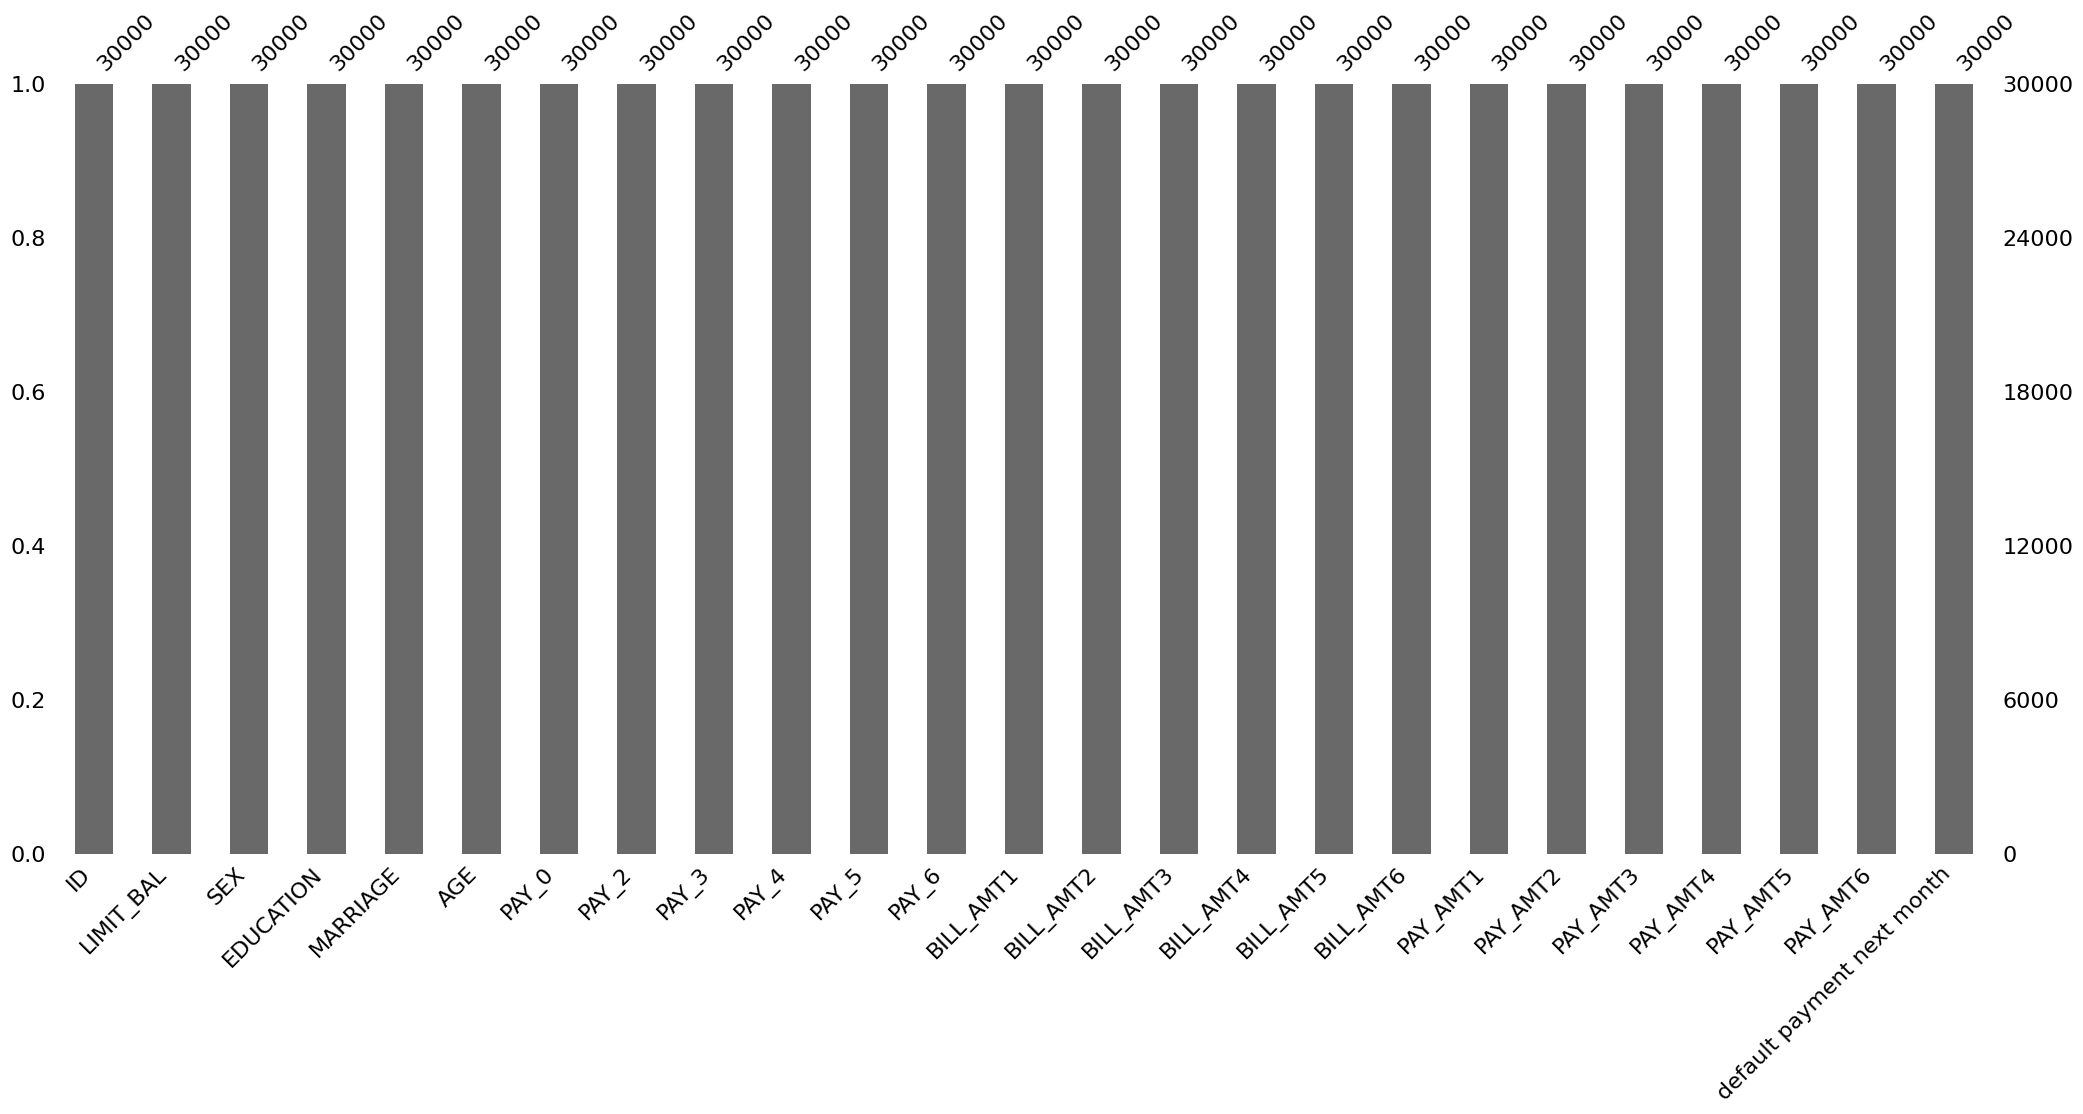

In [9]:
# Visualizing the missing values
msno.bar(dataset)

### What did you know about your dataset?

From the initial analysis, we can see that we have a dataset containing 26 columns and 30,000 rows. We can also see that we don't have any missing or duplicate values indicating that we have a clean dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

*   Amount:- Total credit amount

*   Gender:- Gender of the Credit Card holder

*   Education:- Educational qualification of the Credit Card holder

*   marital status:- Married or not

*   age:- age

*   History of Past Payments:- Payments made in the past

*   Amount of bill statement:- Total Bill amount

*   Amount of previous statement:- Previous amount paid

*   PAY_0:- Repayment status in September 2005

*   PAY_2:- Repayment status in August 2005

*   PAY_3:- Repayment status in July 2005

*   PAY_4:- Repayment status in June 2005

*   PAY_5:- Repayment status in May 2005

*   PAY_6:- Repayment status in April 2005

*   BILL_AMT1:- Bill Amount statement in September 2005

*   BILL_AMT2:- Bill Amount statement in August 2005

*   BILL_AMT3:- Bill Amount statement in July 2005

*   BILL_AMT4:- Bill Amount statement in June 2005

*   BILL_AMT5:- Bill Amount statement in May 2005

*   BILL_AMT6:- Bill Amount statement in April 2005

*   PAY_AMT1:- Amount of Previous payment in September 2005

*   PAY_AMT2:- Amount of Previous payment in August 2005

*   PAY_AMT3:- Amount of Previous payment in July 2005

*   PAY_AMT4:- Amount of Previous payment in June 2005

*   PAY_AMT5:- Amount of Previous payment in May 2005

*   PAY_AMT6:- Amount of Previous payment in April 2005

*   ( Values:- -1: Paid duly, 1: payment delay for one month, 2: Payment delay for two months,.....9: Payment delay fot nine months)

*   default payment next month:- Default Payment(1 = Yes,0 = No)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print(dataset.apply(lambda col: col.unique()))

ID                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
LIMIT_BAL                     [20000, 120000, 90000, 50000, 500000, 100000, ...
SEX                                                                      [2, 1]
EDUCATION                                                 [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                           [1, 2, 3, 0]
AGE                           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0                                       [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2                                       [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3                                       [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4                                       [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5                                          [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6                                          [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
BILL_AMT1                     [3913, 268

In [13]:
# Check number of Unique Values for each variable
print(dataset.apply(lambda col: col.nunique()))

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# First we will rename our columns to a more simple one for coding
dataset = dataset.rename(columns = {'ID':'id',

                                    'LIMIT_BAL':'limit_bal',

                                    'SEX':'sex',

                                    'EDUCATION':'education', 'MARRIAGE':'marriage', 'AGE':'age', 'default payment next month':'defaulter_status',

                                    'PAY_0':'pay_sept','PAY_2':'pay_aug','PAY_3':'pay_jul','PAY_4':'pay_june','PAY_5':'pay_may','PAY_6':'pay_april',

                                    'BILL_AMT1':'billamt_sept','BILL_AMT2':'billamt_aug','BILL_AMT3':'billamt_jul','BILL_AMT4':'billamt_june','BILL_AMT5':'billamt_may','BILL_AMT6':'billamt_april',

                                    'PAY_AMT1':'payamt_sept','PAY_AMT2':'payamt_aug','PAY_AMT3':'payamt_july','PAY_AMT4':'payamt_june','PAY_AMT5':'payamt_may','PAY_AMT6':'payamt_april',
                                    })

In [15]:
dataset.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_april',
       'billamt_sept', 'billamt_aug', 'billamt_jul', 'billamt_june',
       'billamt_may', 'billamt_april', 'payamt_sept', 'payamt_aug',
       'payamt_july', 'payamt_june', 'payamt_may', 'payamt_april',
       'defaulter_status'],
      dtype='object')

In [16]:
dataset.head()

,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_jul,pay_june,...,billamt_june,billamt_may,billamt_april,payamt_sept,payamt_aug,payamt_july,payamt_june,payamt_may,payamt_april,defaulter_status
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
df=dataset.copy()

In [18]:
df.replace({'sex':{1:'male',2:'female'}, 'education':{1: 'graduate',2: 'university', 3: 'high school', 4:'others', 5:'others', 6:'others', 0:'others'},'defaulter_status':{0: 'No',1:'Yes'},'marriage':{0:'others', 1:'married', 2:'single', 3:'others'}},inplace= True)

In [19]:
print(df.apply(lambda col: col.nunique()))

id                  30000
limit_bal              81
sex                     2
education               4
marriage                3
age                    56
pay_sept               11
pay_aug                11
pay_jul                11
pay_june               11
pay_may                10
pay_april              10
billamt_sept        22723
billamt_aug         22346
billamt_jul         22026
billamt_june        21548
billamt_may         21010
billamt_april       20604
payamt_sept          7943
payamt_aug           7899
payamt_july          7518
payamt_june          6937
payamt_may           6897
payamt_april         6939
defaulter_status        2
dtype: int64


### What all manipulations have you done and insights you found?


1.   We changed the name of the columns for easier coding practices

2.   For our own convenience and vizualization purposes, we have replaced the values of :-

*   In 'education' column, we have replaced the value 1 by 'graduate', 2 by 'university', 3 by 'high school' and rest of the values by 'others'

*   In 'defaulter_status" column, we replace the value 0 by 'No' and 1 by 'yes'

*   In 'marriage' column, we replace the value 1 by 'married', 2 by 'single' and 0 and 3 by 'others'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [20]:
# Creating a function to print bar chart for the entered columns as inputs
def plot_countplot(df, x, t1):
  fig, ax = plt.subplots(figsize=(18,6))
  sns.countplot(data=df, x=x, ax=ax)
  plt.title(t1)
  #plt.xticks(dataset[x])
  plt.xlabel(x)

In [21]:
def plot_countplot_defaulter(df, x, t1):
  fig, ax = plt.subplots(figsize=(18,6))
  sns.countplot(data=df, x=x, ax=ax, hue='defaulter_status')
  plt.title(t1)
  #plt.xticks(dataset[x])
  plt.xlabel(x)

#### Chart - 1

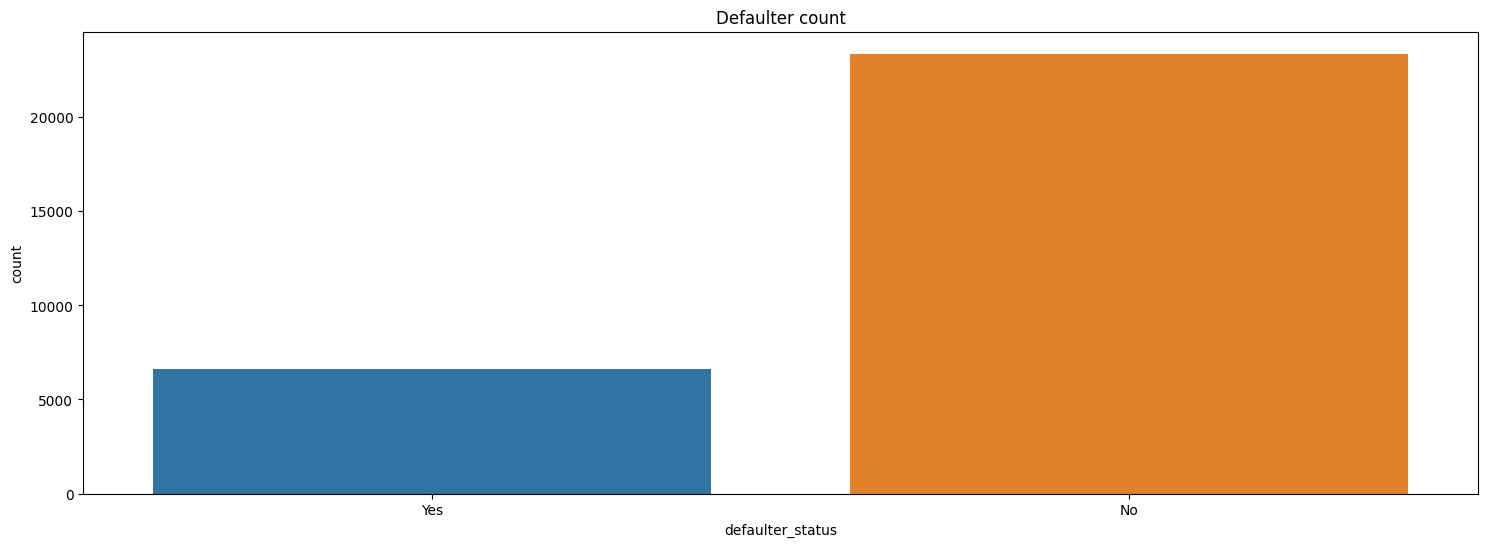

In [22]:
# Chart - 1 visualization code
plot_countplot(df, 'defaulter_status', 'Defaulter count')

In [23]:
df['defaulter_status'].value_counts()

No     23364
Yes     6636
Name: defaulter_status, dtype: int64

##### 1. Why did you pick the specific chart?

We are using Seaborn's countplot because it is used to represent the counts of occurence of observations present in the respective categorical variable

##### 2. What is/are the insight(s) found from the chart?

As we can see, the number of people who have defaulted on their credit card payments is around 30%.

#### Chart - 2

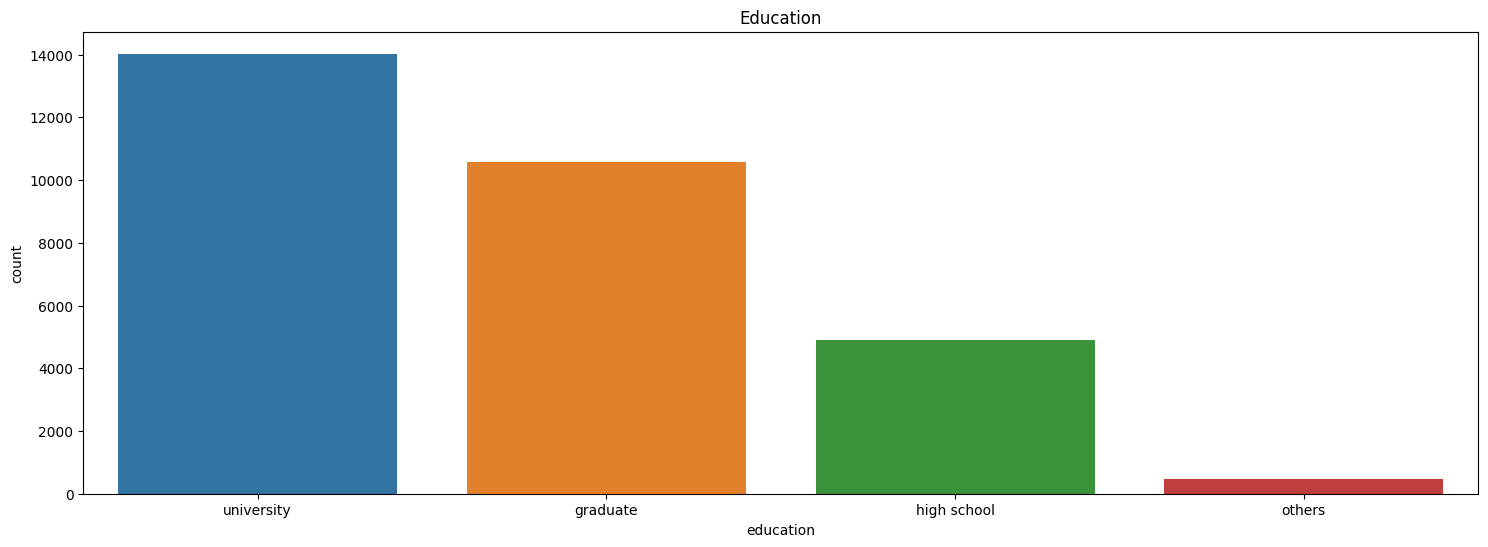

In [24]:
plot_countplot(df, 'education', 'Education')

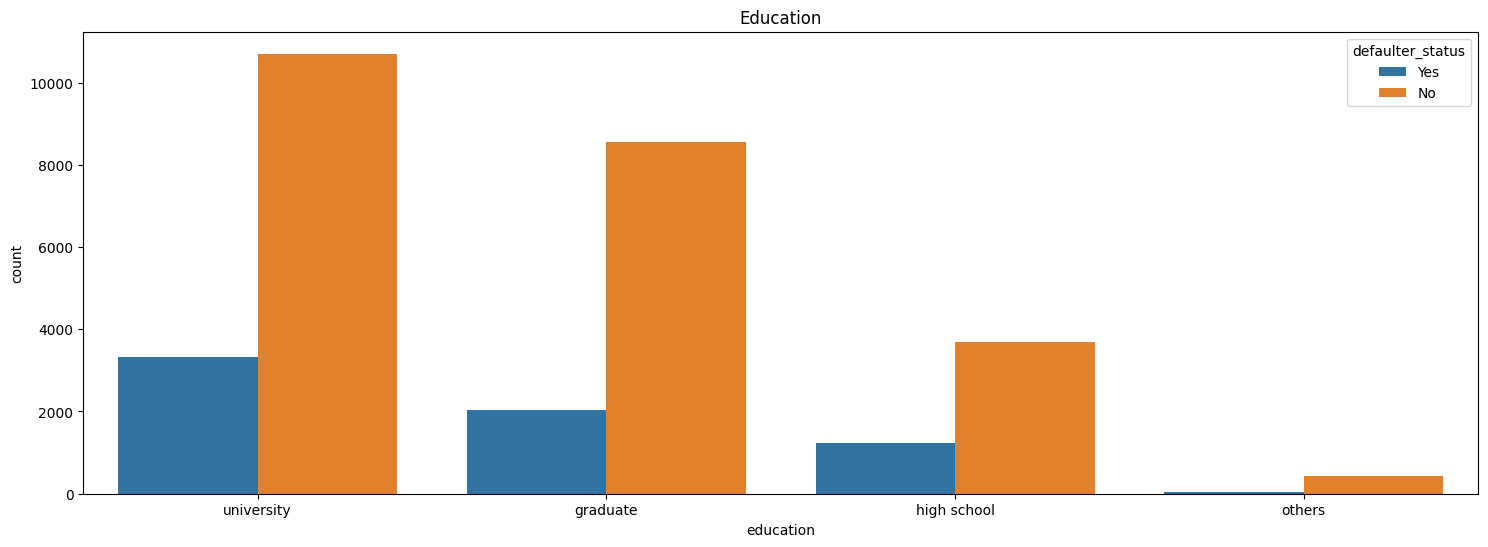

In [25]:
# Chart - 2 visualization code
plot_countplot_defaulter(df, 'education', 'Education' )

In [26]:
df['education'].value_counts()

university     14030
graduate       10585
high school     4917
others           468
Name: education, dtype: int64

In [27]:
df['education'].groupby(df['defaulter_status']).value_counts()

defaulter_status  education  
No                university     10700
                  graduate        8549
                  high school     3680
                  others           435
Yes               university      3330
                  graduate        2036
                  high school     1237
                  others            33
Name: education, dtype: int64

##### 1. Why did you pick the specific chart?

We are using Seaborn's countplot because it is used to represent the counts of occurences of observations in the respective categorical variable

##### 2. What is/are the insight(s) found from the chart?

The maximum number of Credit Card holders are University graduates, followed closely by Graduate School and High School. The maximum number of Credit Card defaulters were from High School at around 25% followed closely by University Graduates and the least by Graduate School Credit Card holders. But overall, we can safely conclude that no matter the educational qualification, the number of defaulters is around 25%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The maximum number of proportional Credit Card defaulters were held by those in High School. We recommend to increase the eligibility criteria for providing the facility of Credit Card to High School students. This is because the defaulters who are University graduates are more likely and probable to pay back their default amounts

#### Chart - 3

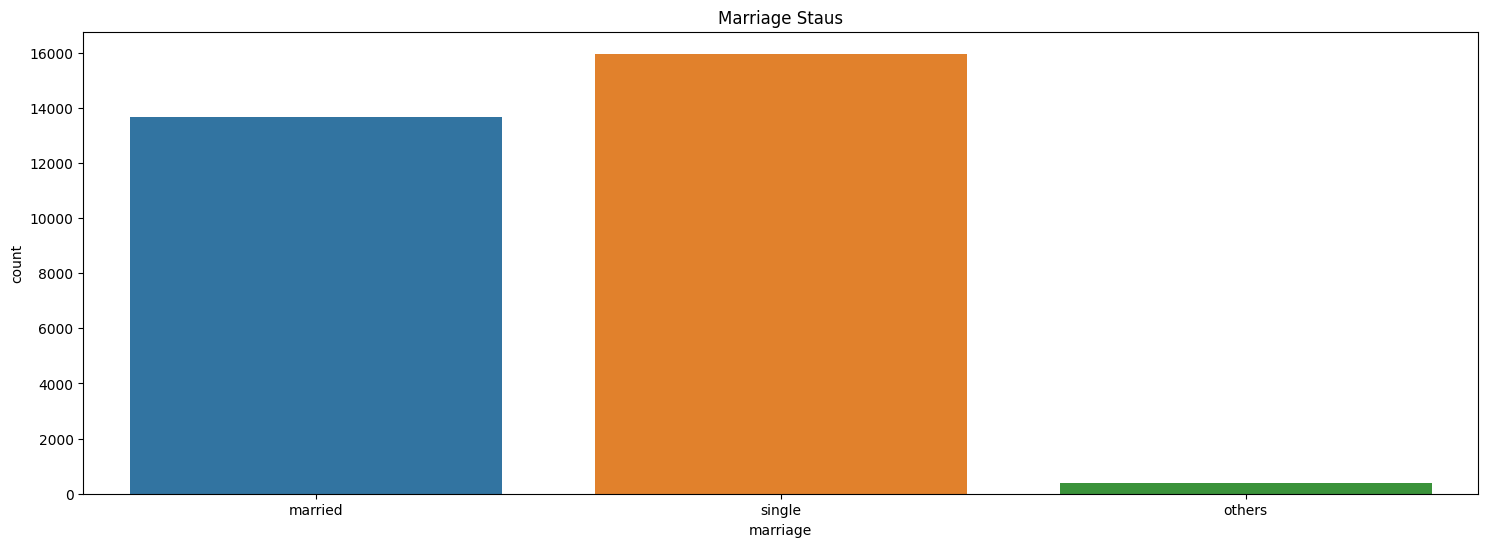

In [28]:
# Chart - 3 visualization code
plot_countplot(df, 'marriage', 'Marriage Staus')

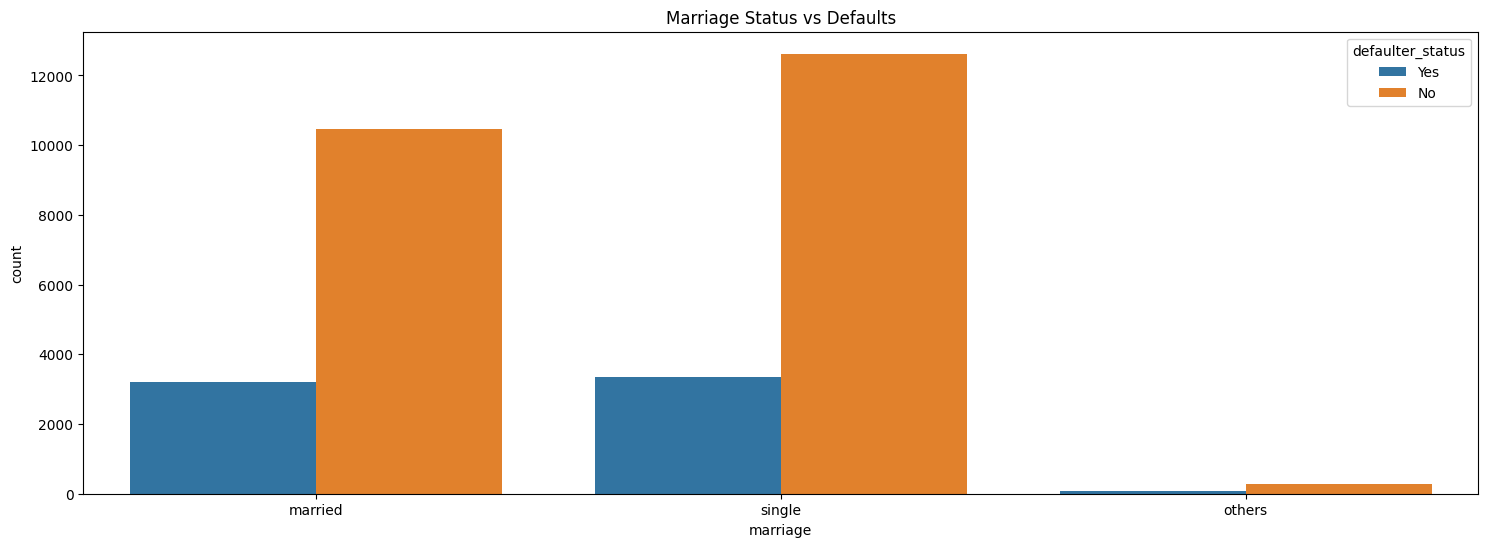

In [29]:
plot_countplot_defaulter(df, 'marriage', 'Marriage Status vs Defaults')

In [30]:
df['marriage'].value_counts()

single     15964
married    13659
others       377
Name: marriage, dtype: int64

In [31]:
df['marriage'].groupby(df['defaulter_status']).value_counts()

defaulter_status  marriage
No                single      12623
                  married     10453
                  others        288
Yes               single       3341
                  married      3206
                  others         89
Name: marriage, dtype: int64

##### 1. Why did you pick the specific chart?

We will use Seaborn's countplot because it is used to count the occurences of  observations in the respective categorical variable

##### 2. What is/are the insight(s) found from the chart?

We can infer that around 45% of the Credit Card holders are married and rest are single. Around 23% of the Credit Card defaulters are married and 21% of the defaulters are single. Overall, we can conclude that there is not much difference in the number of defaulters irrespective of their marital status

#### Chart - 4

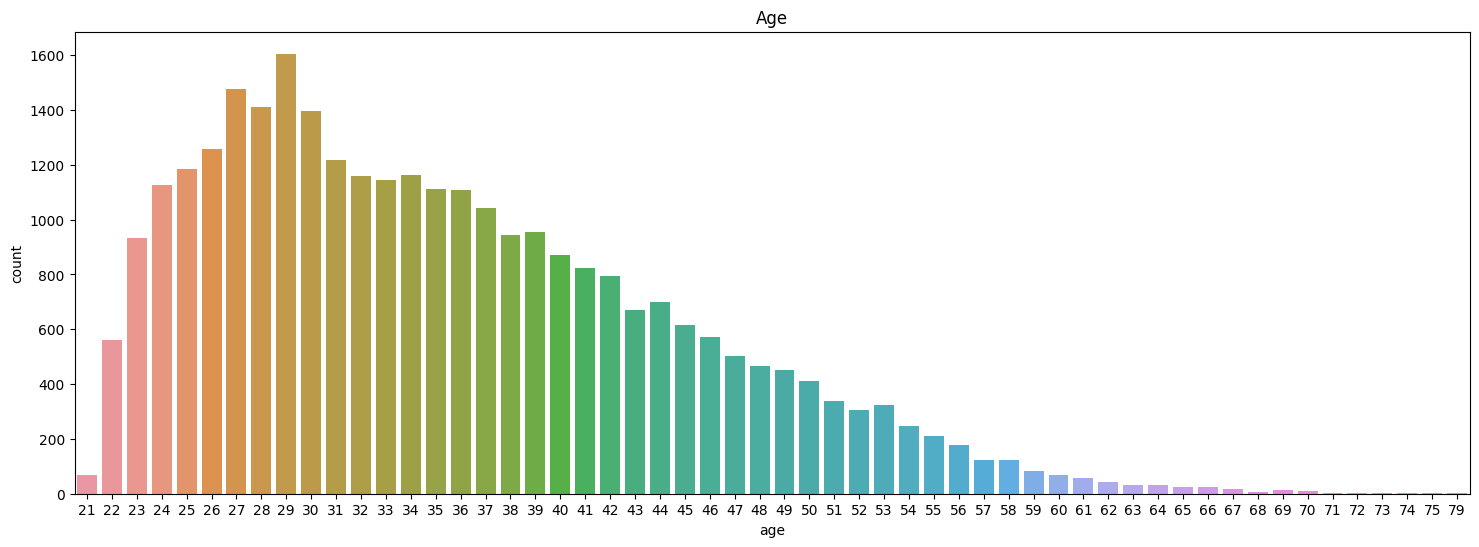

In [32]:
# Chart - 4 visualization code
plot_countplot(df,'age','Age')

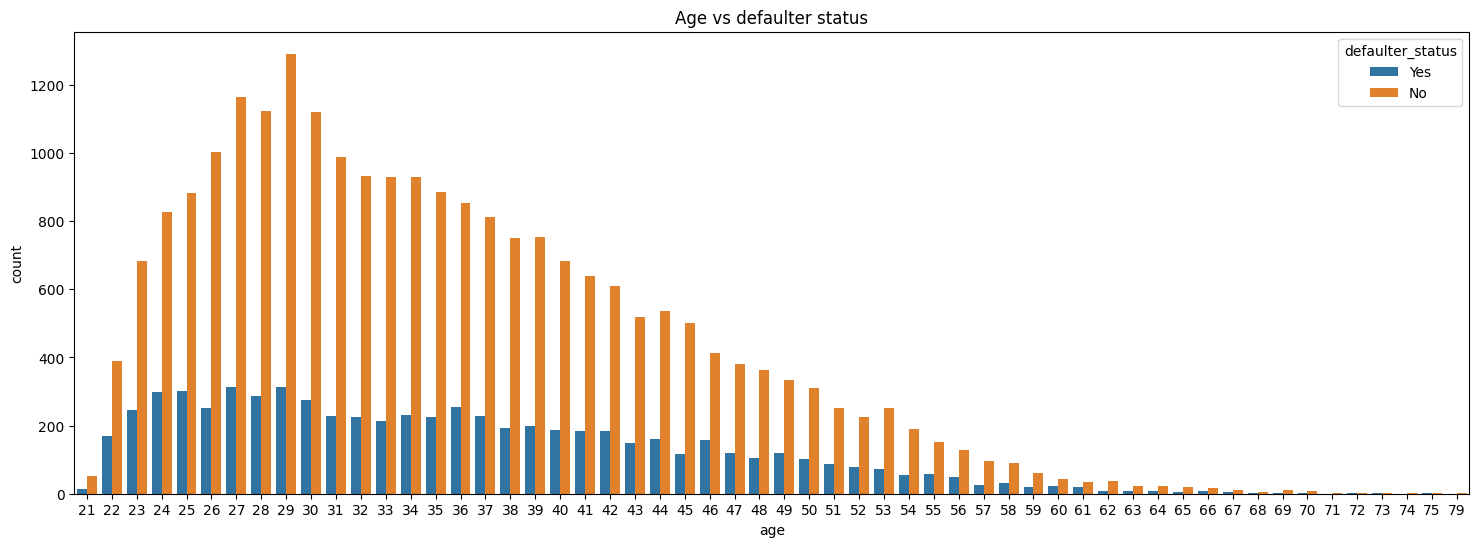

In [33]:
plot_countplot_defaulter(df,'age','Age vs defaulter status')

##### 1. Why did you pick the specific chart?

We use Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorrcial variable.

##### 2. What is/are the insight(s) found from the chart?

From the above visualizations, we can infer that most of the credit card holders are in the age group of 25-35. We can also see that till the age of 30, the number of credit card holders for each age increases linearly but after that it gradually decreases till the age of 79. We can also notice that till the age of 29, the number of defaulters increase at a much slower rate as compared to the rate of increase of credit card holders. After the age of29, the number of defaulters decrease at a much slower rate as compared to the rate of decrease of credit card holders from which we can infer that the probability of a person defaulting on his credit card payment increases as we go from age 29-79.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Banking Institutions could try having conversation with the credit card defaulters, understand their problem and come up with a solution for repayment of their dues. The other common practice might be to convert the total repayment amount to loan EMI's which will have a much lesser rate of interest. This would decrease the total amount payable for the customer which will act as an incentive for the customer to pay back their dues because now the amount to be paid will be considerably less. This will help the banks to recover majority of the amount they were due to receive whereas in other cases, they might lose the entire amount altogether.

#### Chart - 5

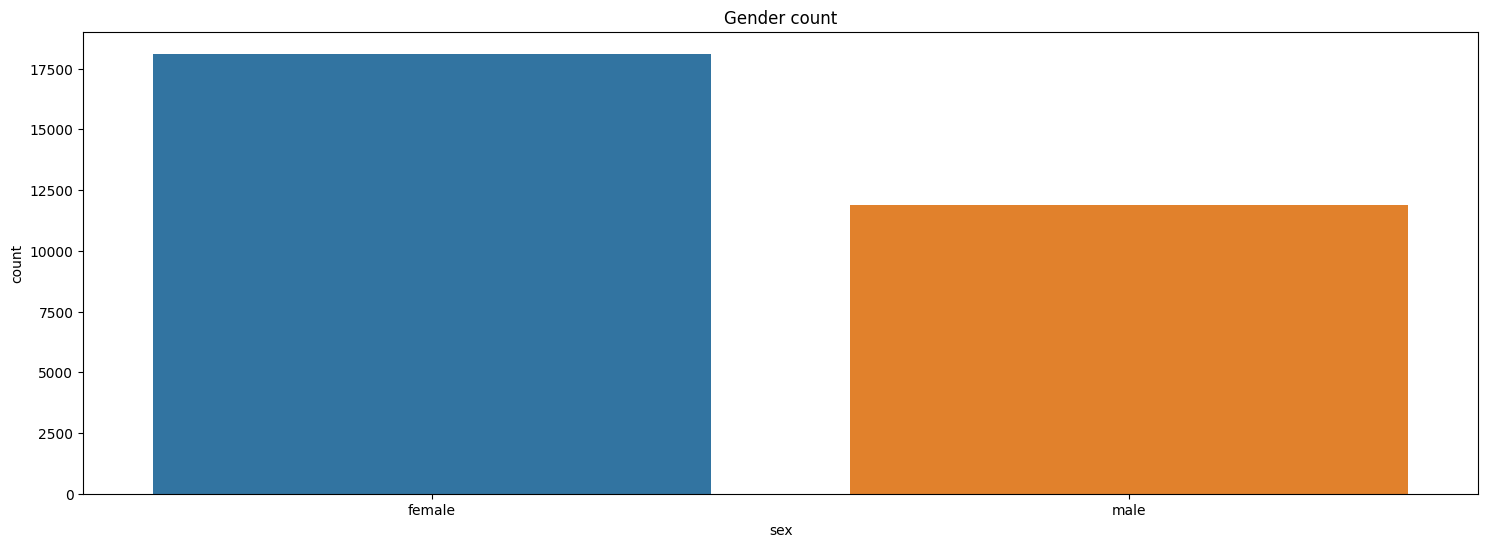

In [34]:
# Chart - 5 visualization code
plot_countplot(df, 'sex', 'Gender count')

In [35]:
df['sex'].value_counts()

female    18112
male      11888
Name: sex, dtype: int64

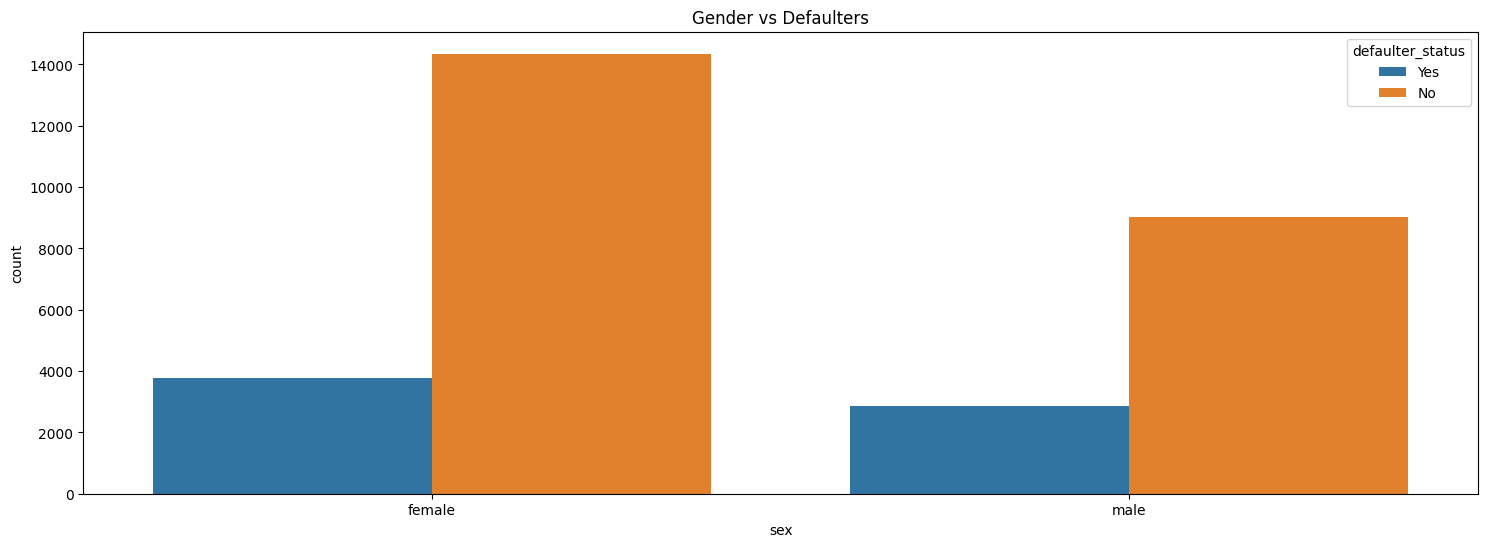

In [36]:
plot_countplot_defaulter(df, 'sex', 'Gender vs Defaulters')

In [37]:
df['sex'].groupby(df['defaulter_status']).value_counts()

defaulter_status  sex   
No                female    14349
                  male       9015
Yes               female     3763
                  male       2873
Name: sex, dtype: int64

##### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables

##### 2. What is/are the insight(s) found from the chart?

In [38]:
3763/18112

0.20776280918727916

In [39]:
2873/11888

0.2416722745625841

We can see that there are around 18000 female Credit Card holders and around 12000 male Credit Card holders. Around 20.77% of the female credit card holders have defaulted on their payments while for their male counterparts the statistic lies at 24.17% indicating males are little more likely to default on their credit ard payments as compared to females.

#### Chart - 6

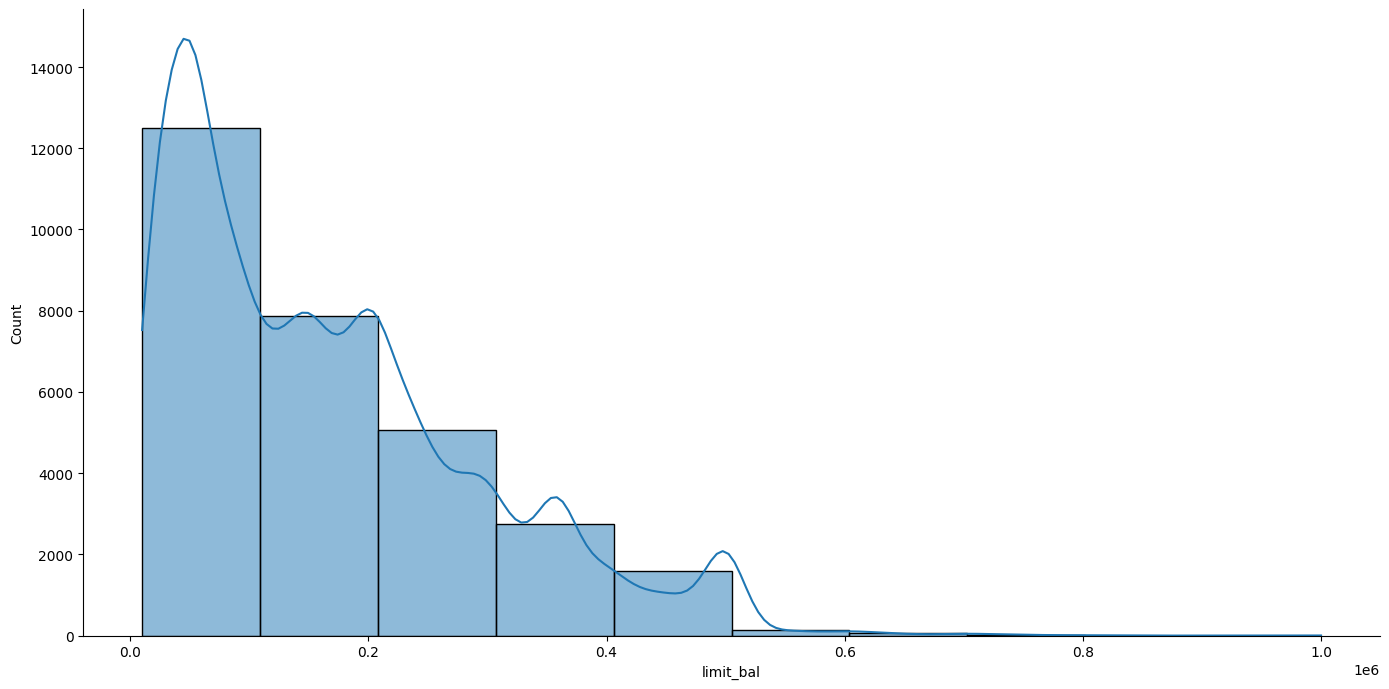

In [40]:
#fig,ax = plt.subplots(figsize=(18,6))
sns.displot(df['limit_bal'], kde=True, bins=10, height= 7, aspect = 2)

##### 1. Why did you pick the specific chart?

We used Seaborn's Distplot because distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above visualization, we can say that most of the credit card holders (around 20,000) have a limit balance less than 2,00,000 NTD, around 10,000 holders have a limit balace less than 5,00,000 NTD.

#### Chart - 7

<Axes: xlabel='limit_bal', ylabel='Count'>

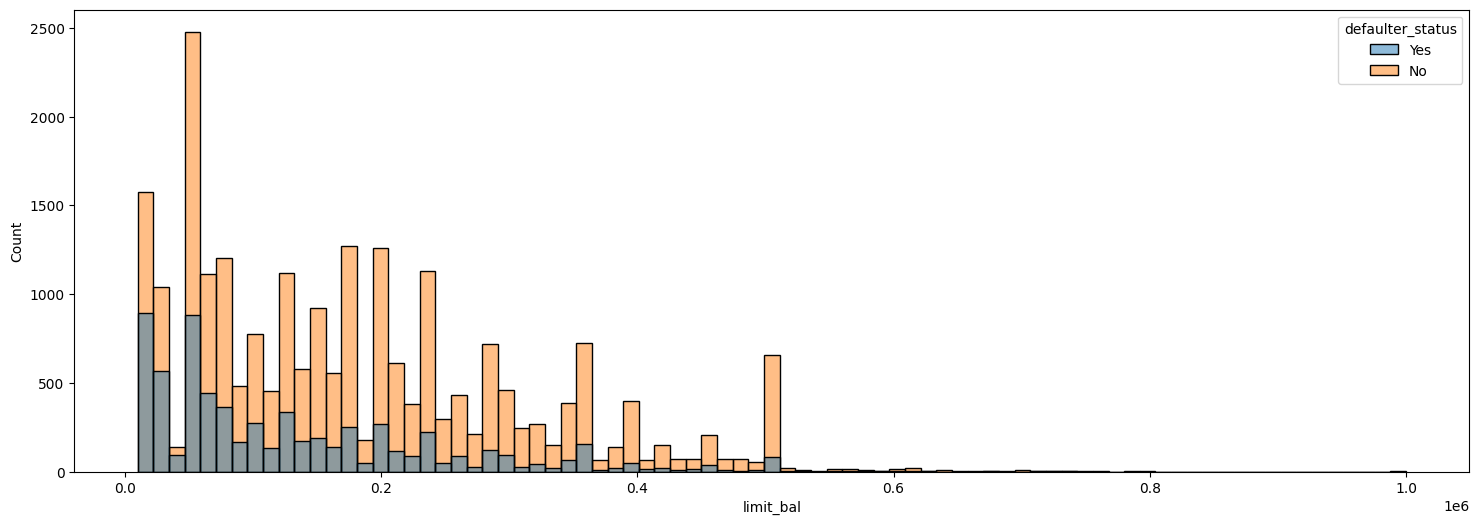

In [41]:
# Chart - 7 visualization code
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(x = "limit_bal", hue = "defaulter_status", data = df, ax=ax)

##### 1. Why did you pick the specific chart?

In the displot for 'limit_bal', we use hue ='defaulter_status' to have a look at the various limit balances of credit card holders and their respective defaulter status.

##### 2. What is/are the insight(s) found from the chart?

From the initial analysis, we can see that as the credit card limit balance increases, the number or credit card defaulters decreases implying credit card holders with higher credit card limits are less likely to default on their payments.

#### Chart - 8

In [42]:
dataset.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_april',
       'billamt_sept', 'billamt_aug', 'billamt_jul', 'billamt_june',
       'billamt_may', 'billamt_april', 'payamt_sept', 'payamt_aug',
       'payamt_july', 'payamt_june', 'payamt_may', 'payamt_april',
       'defaulter_status'],
      dtype='object')

In [43]:
df['pay_april'].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [44]:
(df['billamt_june']>54506).value_counts()

False    22500
True      7500
Name: billamt_june, dtype: int64

In [45]:
(df['billamt_april']>50000).value_counts()

False    22673
True      7327
Name: billamt_april, dtype: int64

In [46]:
(df['billamt_may']>50900).value_counts()

False    22628
True      7372
Name: billamt_may, dtype: int64

In [47]:
(df['billamt_jul']>60165).value_counts()

False    22500
True      7500
Name: billamt_jul, dtype: int64

In [48]:
(df['billamt_aug']>64000).value_counts()

False    22498
True      7502
Name: billamt_aug, dtype: int64

In [49]:
(df['billamt_sept']>67091).value_counts()

False    22500
True      7500
Name: billamt_sept, dtype: int64

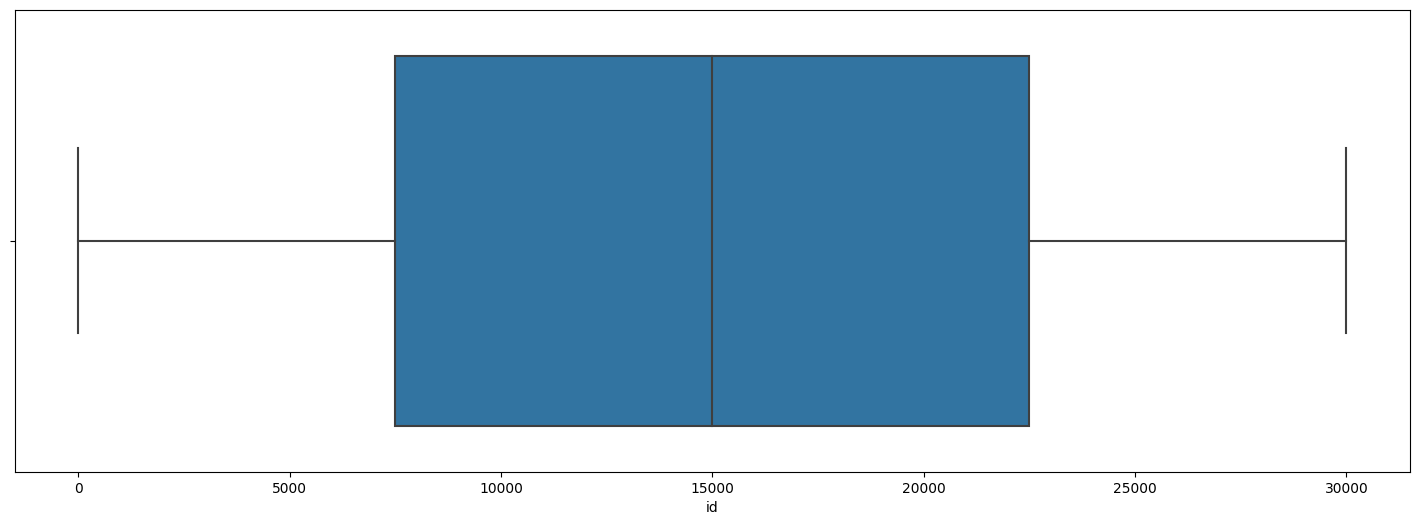

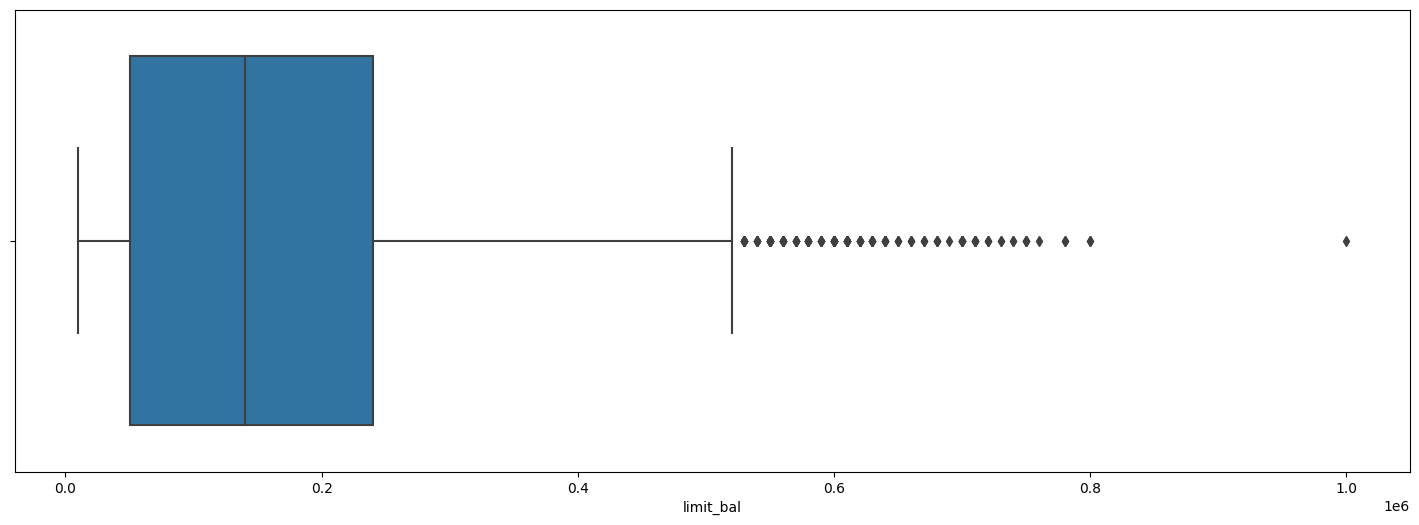

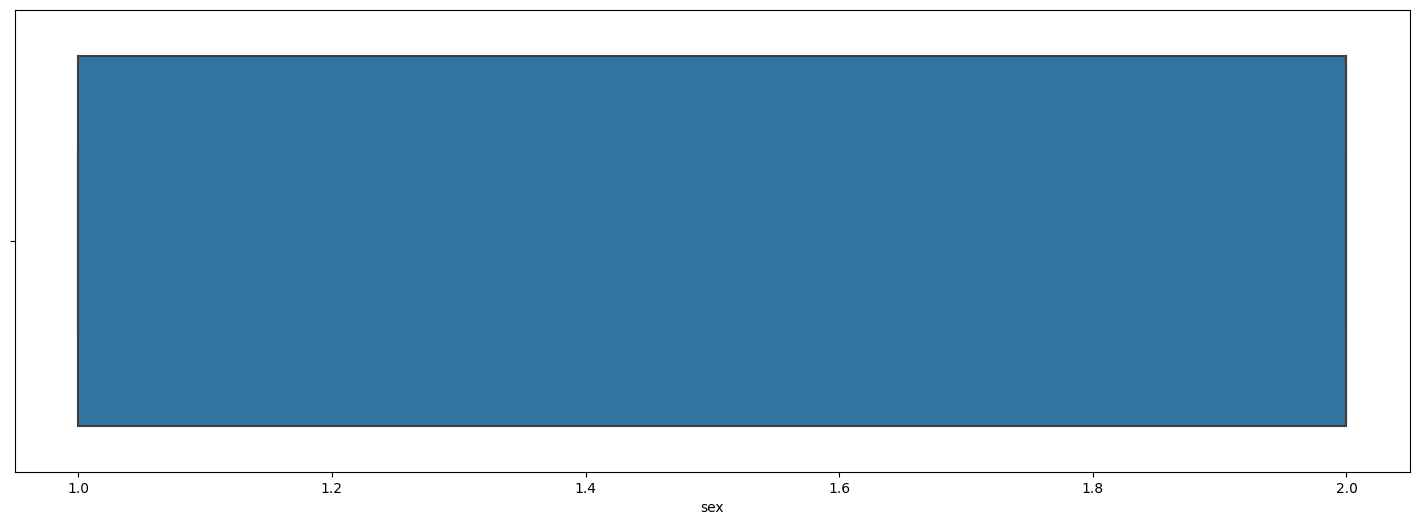

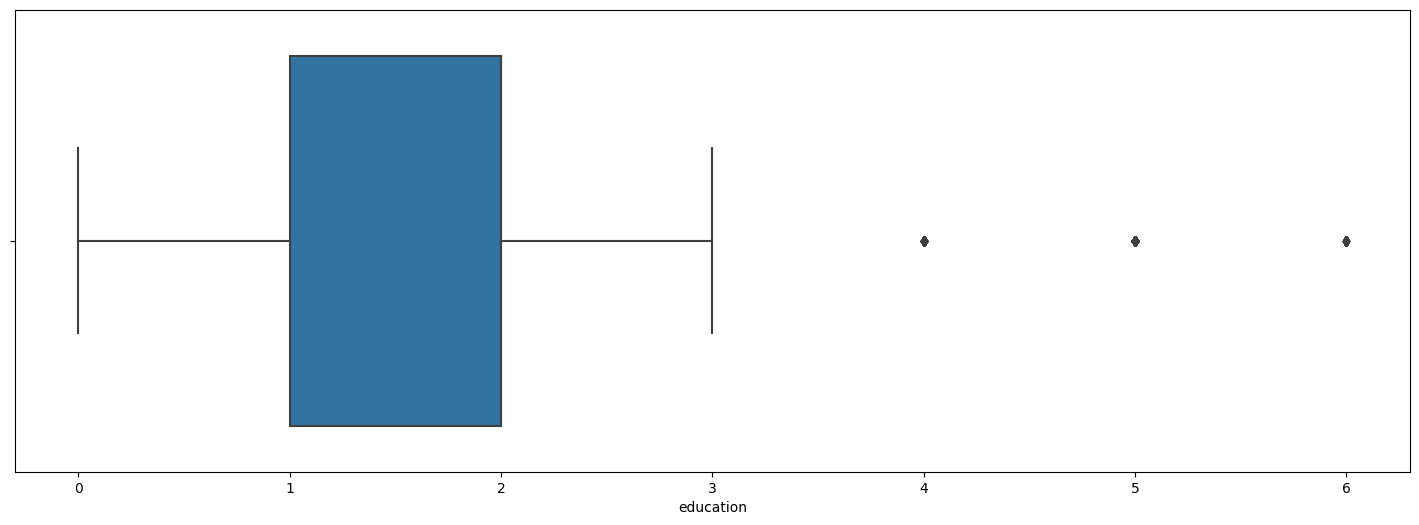

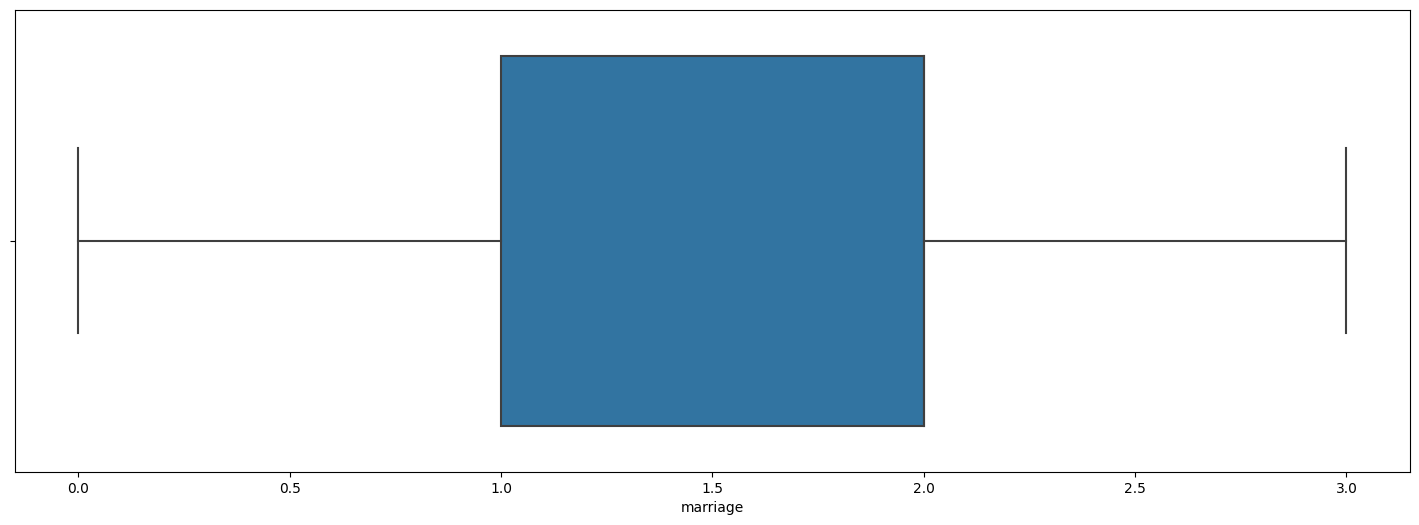

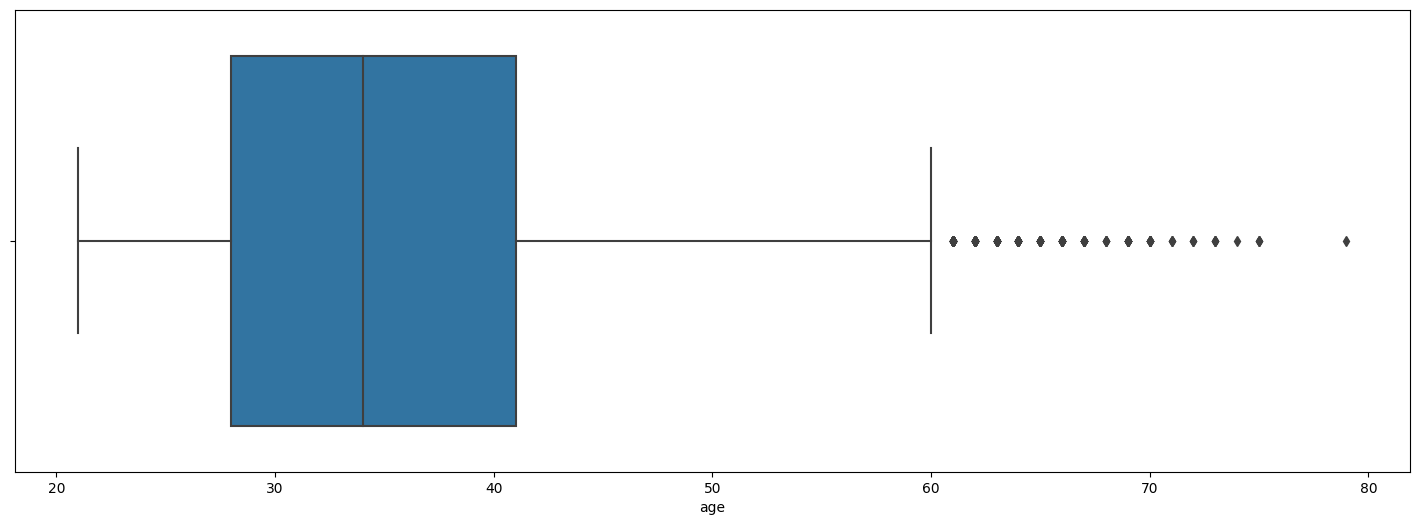

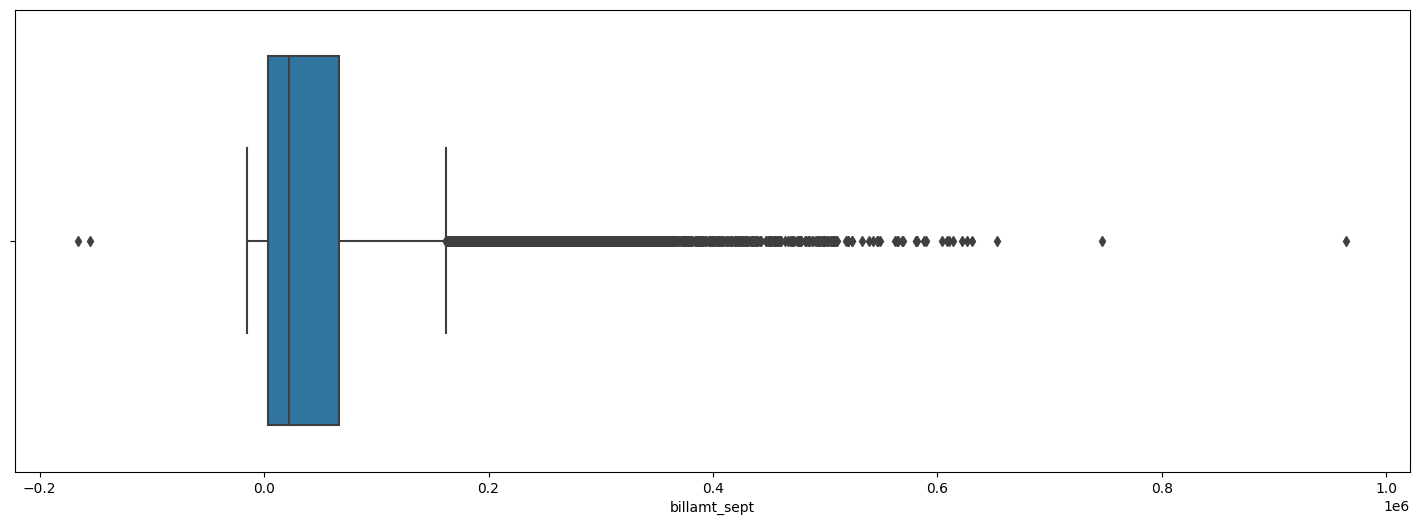

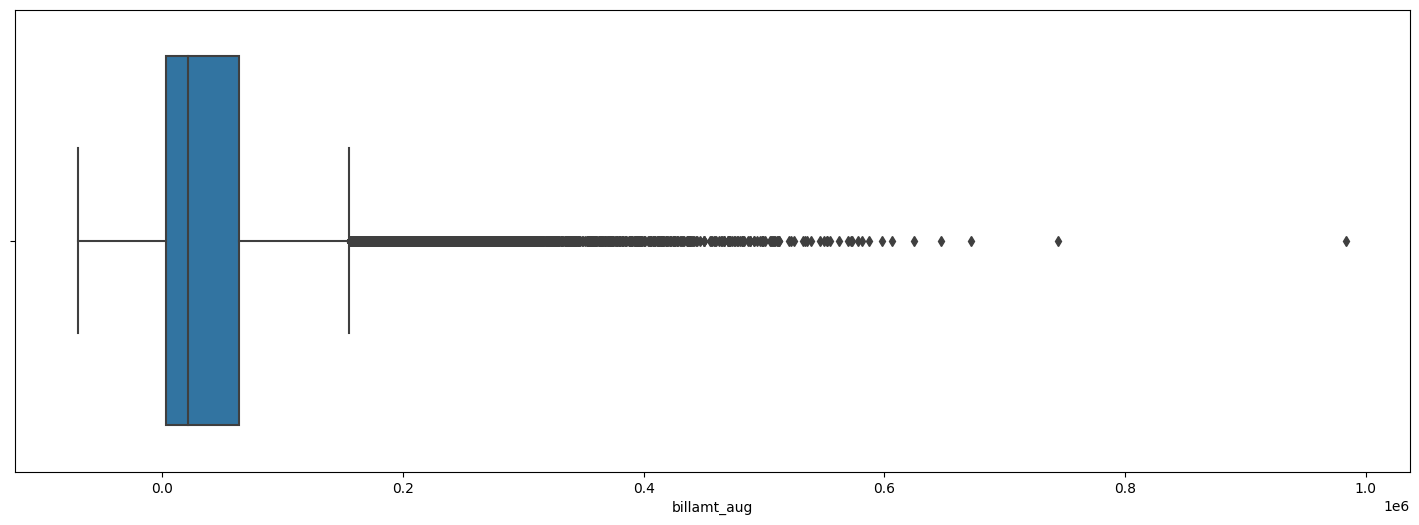

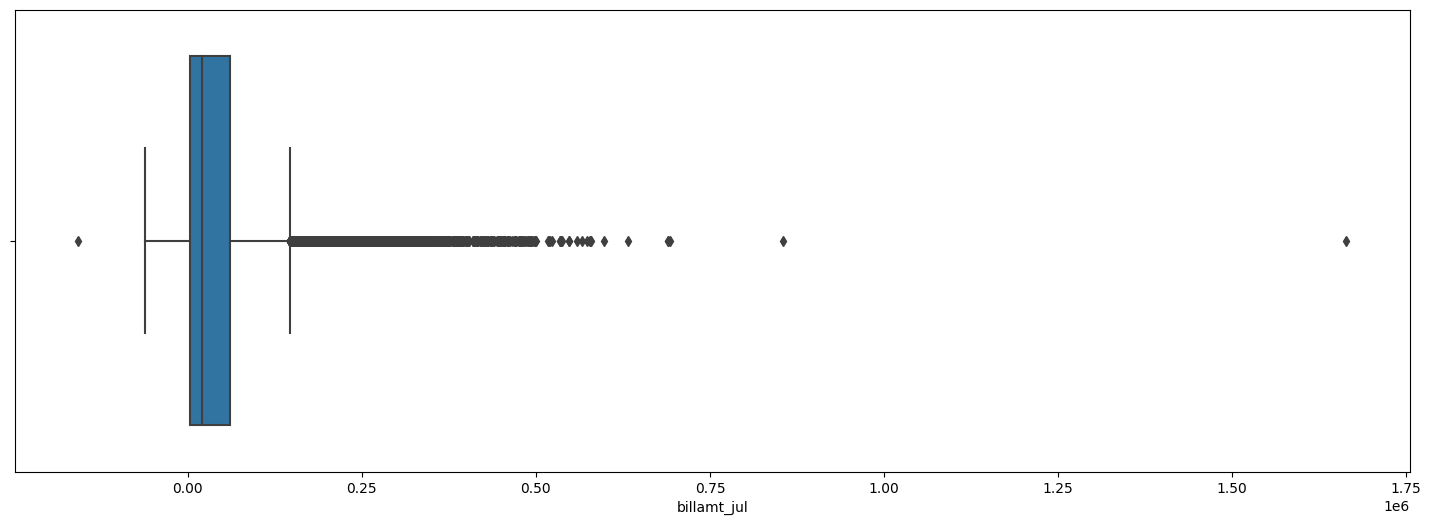

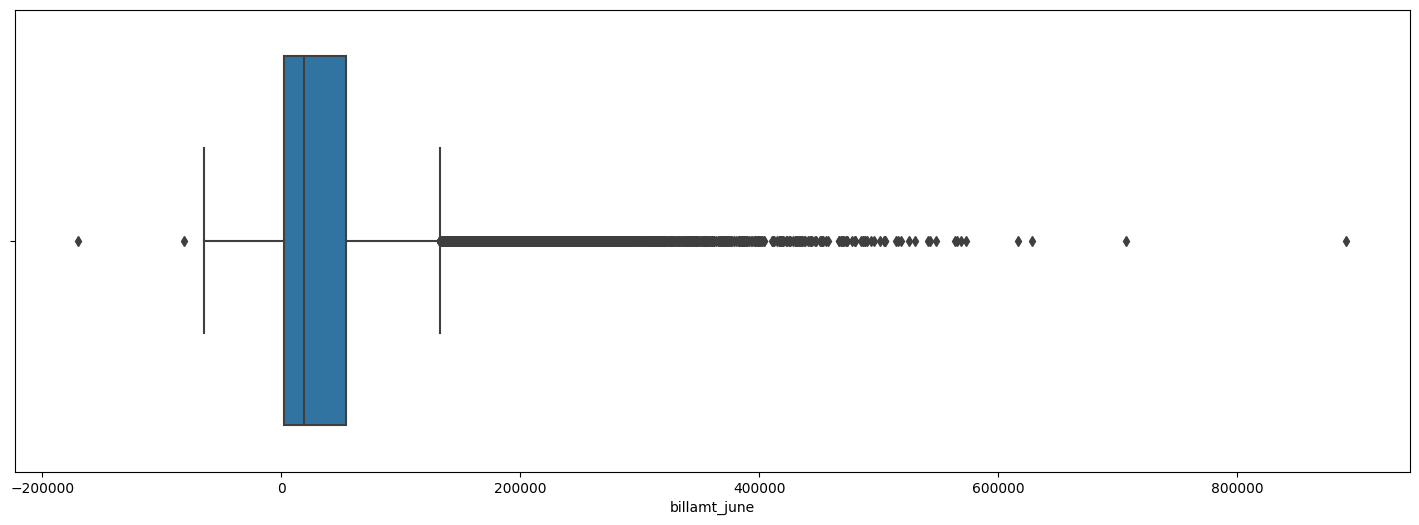

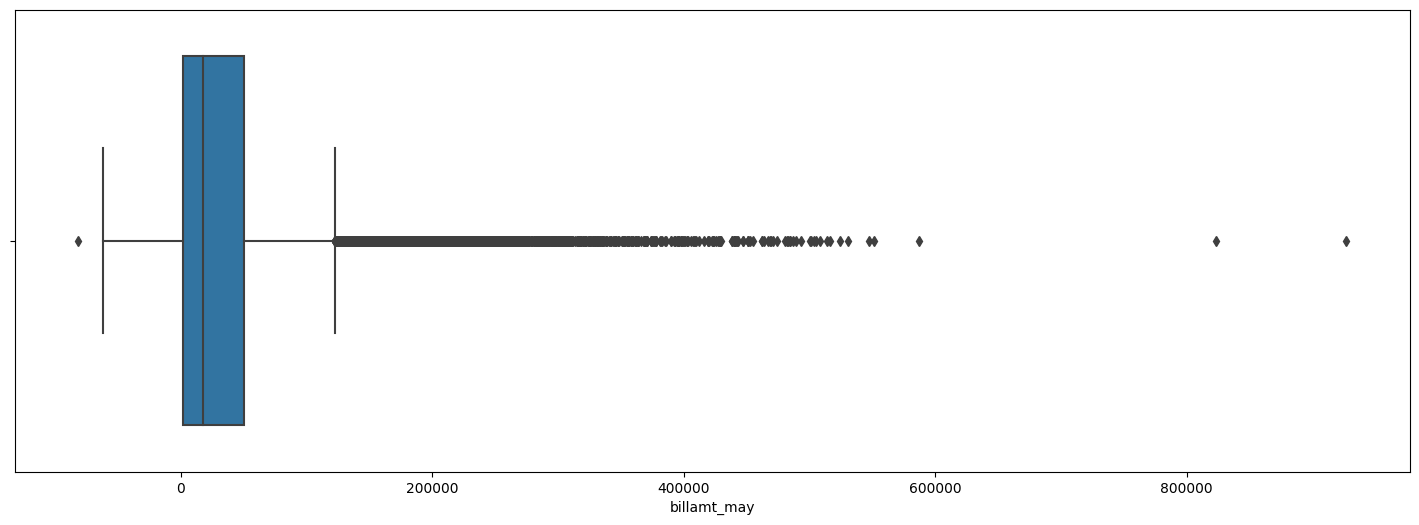

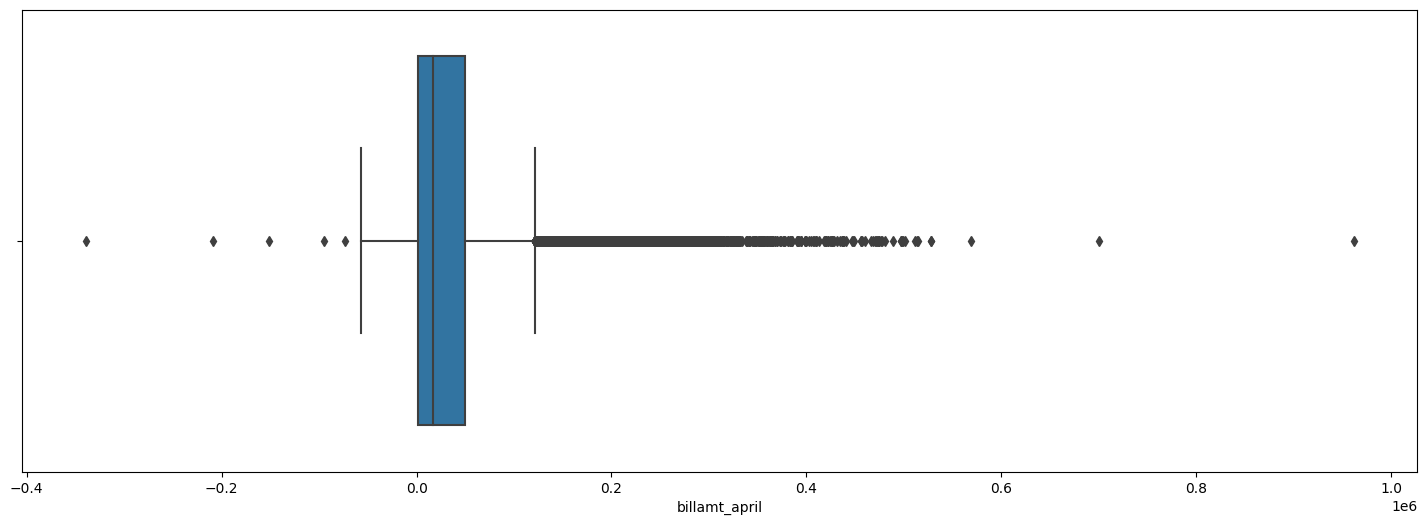

In [50]:
# Chart - 8 visualization code
num_cols=dataset.select_dtypes(include='number')
cols= ['id', 'limit_bal', 'sex', 'education', 'marriage', 'age',
       'billamt_sept', 'billamt_aug', 'billamt_jul', 'billamt_june',
       'billamt_may', 'billamt_april']
for i in cols:
  fig = plt.figure(figsize=(18,6))
  ax=fig.gca()
  sns.boxplot(x=dataset[i])

#### Chart - 9 - Correlation Heatmap

<ipython-input-51-f99729984e36>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

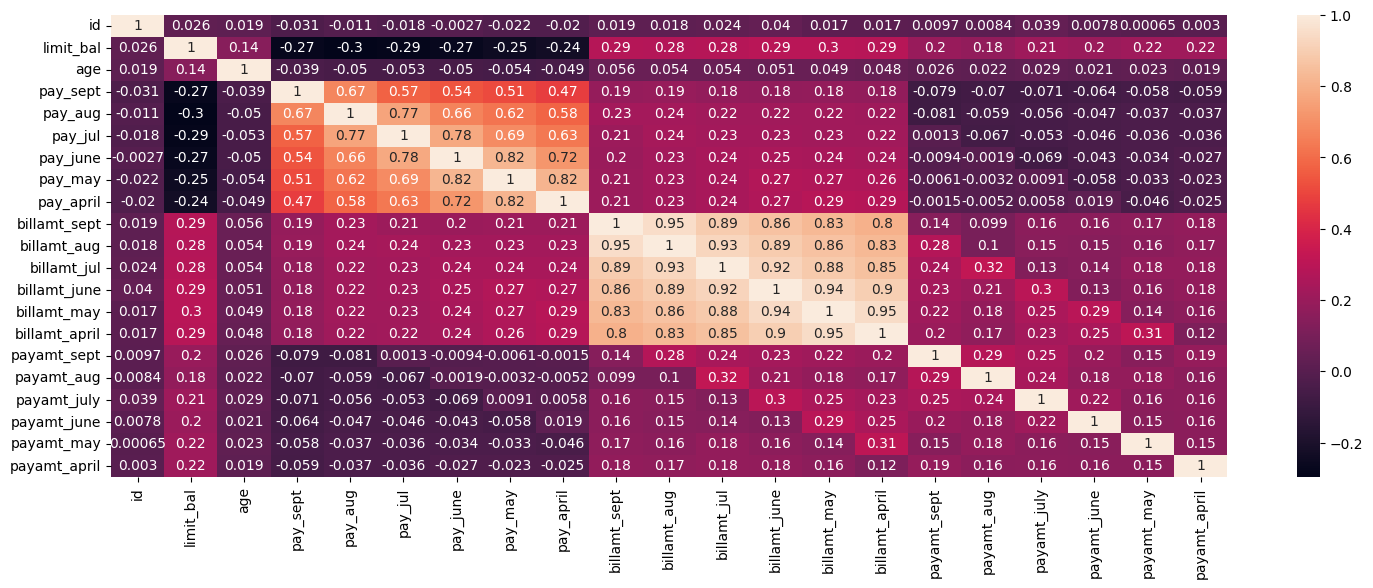

In [51]:
# Correlation Heatmap visualization code
fig,ax = plt.subplots(figsize=(18,6))
sns.heatmap(df.corr(), annot= True)

## ***5. Feature Engineering & Data Pre-processing***

###1. Handling Imbalanced Dataset

In [52]:
# Handling Outliers & Outlier treatments
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(dataset[(i for i in list(dataset.describe(include='all').columns) if i != 'defaulter_status')], dataset['defaulter_status'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [53]:
bal_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))
bal_df['defaulter_status'] = y_smote

<Axes: xlabel='defaulter_status', ylabel='count'>

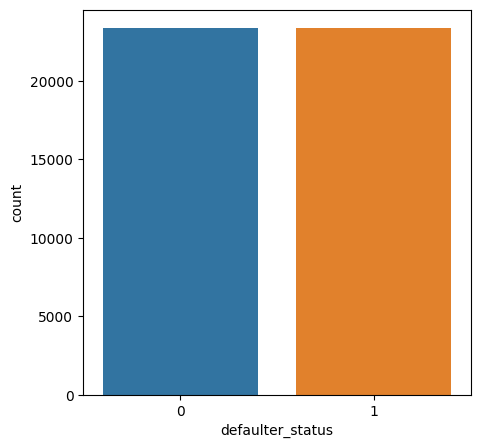

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(data = bal_df, x= 'defaulter_status')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE:- Synthetic Minority Oversampling Technique.

SMOTE is a technique used in machine learning designed to address class imbalance in classification tasks. The primary objective is to balance class distribution by generating synthetic instances for the minority class, thereby improving model performance on minority class instances.
SMOTE identifies minority instances , selects their k-nearest neighbours and creates synthetic instances by interpolating features between the minority instance and its neighbours. SMOTE mitigates bias caused by imbalanced classes, enhances the model's ability to generalize to minority class instances.
SMOTE should be applied only to the training set to prevent the leakage of data to the test set.

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [55]:
# Manipulate Features to minimize feature correlation and create new features
bal_df.skew().sort_values()

sex                 -0.022344
defaulter_status     0.000000
id                   0.016680
marriage             0.308289
pay_aug              0.580811
pay_sept             0.601745
pay_jul              0.684422
age                  0.696733
pay_april            0.895557
pay_june             0.931709
pay_may              0.956731
education            0.986308
limit_bal            1.111525
billamt_sept         2.722705
billamt_aug          2.767980
billamt_june         2.874646
billamt_april        2.875243
billamt_may          2.930793
billamt_jul          3.024144
payamt_april        11.631947
payamt_may          12.289269
payamt_june         14.220499
payamt_sept         16.395317
payamt_july         17.967560
payamt_aug          34.217437
dtype: float64

We can use log transformation on the payamt columns

In [56]:
# Replacing the values in the columns to genralize the values we don't need
bal_df['pay_april']= bal_df['pay_april'].replace([-2,0],'others')
bal_df['pay_may']= bal_df['pay_may'].replace([-2,0],'others')
bal_df['pay_june']= bal_df['pay_june'].replace([-2,0],'others')
bal_df['pay_jul']= bal_df['pay_jul'].replace([-2,0],'others')
bal_df['pay_aug']= bal_df['pay_aug'].replace([-2,0],'others')
bal_df['pay_sept']= bal_df['pay_sept'].replace([-2,0],'others')

# Removing the 'others' values from the columns
bal_df.drop(bal_df.index[bal_df['pay_april']=='others'], inplace = True)
bal_df.drop(bal_df.index[bal_df['pay_may']=='others'], inplace = True)
bal_df.drop(bal_df.index[bal_df['pay_june']=='others'], inplace = True)
bal_df.drop(bal_df.index[bal_df['pay_jul']=='others'], inplace = True)
bal_df.drop(bal_df.index[bal_df['pay_aug']=='others'], inplace = True)
bal_df.drop(bal_df.index[bal_df['pay_sept']=='others'], inplace = True)

# To prevent the log error i.e log (0) is infinity error, we
# replace the values of 0 by 1 and log 1 is 0, which helps us.
bal_df['payamt_april']= bal_df['payamt_april'].replace([0],1)
bal_df['payamt_may']= bal_df['payamt_may'].replace([0],1)
bal_df['payamt_june']= bal_df['payamt_june'].replace([0],1)
bal_df['payamt_july']= bal_df['payamt_july'].replace([0],1)
bal_df['payamt_aug']= bal_df['payamt_aug'].replace([0],1)
bal_df['payamt_sept']= bal_df['payamt_sept'].replace([0],1)

# Using numpy.log() to apply log transformation on the columns.
# We are using log transformation because it normalizes the skewed
# columns, converting them to a more symmetric or bell-shaped curve
# and this also helps in stablizing the variance across different
# levels of the independent variable
bal_df['logpayamt_april'] = np.log(bal_df['payamt_april'])
bal_df['logpayamt_may'] = np.log(bal_df['payamt_may'])
bal_df['logpayamt_june'] = np.log(bal_df['payamt_june'])
bal_df['logpayamt_july'] = np.log(bal_df['payamt_july'])
bal_df['logpayamt_aug'] = np.log(bal_df['payamt_aug'])
bal_df['logpayamt_sept'] = np.log(bal_df['payamt_sept'])

In [57]:
# Now we can drop these columns because we have applied log transformation on these columns and created new ones
bal_df.drop(['payamt_april', 'payamt_may', 'payamt_june', 'payamt_july', 'payamt_aug', 'payamt_sept'], axis = 1, inplace = True)

In [58]:
bal_df.skew().sort_values()

logpayamt_june     -1.143993
logpayamt_aug      -1.141647
logpayamt_sept     -1.126497
logpayamt_july     -1.063112
logpayamt_may      -0.920350
logpayamt_april    -0.867199
defaulter_status   -0.541438
sex                 0.075520
id                  0.117785
pay_aug             0.364656
marriage            0.499607
pay_jul             0.556441
age                 0.609446
pay_sept            0.710909
education           0.772984
pay_april           0.798341
pay_june            0.827676
pay_may             0.836250
limit_bal           1.095477
billamt_april       2.895612
billamt_may         3.032857
billamt_june        3.065281
billamt_jul         3.092211
billamt_aug         3.235187
billamt_sept        3.283548
dtype: float64

**We can see that, through log-transofrmation, the skewness of the columns have reduced.**

### 2. Variance Inflation Factor

In [59]:
def calculate_vif(x):
  vif=pd.DataFrame()
  vif['columns'] = x.columns
  vif['VIF_value'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return (vif)

In [60]:
bal_df.replace({'education':{4:'others', 5:'others', 6:'others', 0:'others'},'marriage':{0:'others', 3:'others'}},inplace= True)
bal_df.columns.unique()

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_april',
       'billamt_sept', 'billamt_aug', 'billamt_jul', 'billamt_june',
       'billamt_may', 'billamt_april', 'defaulter_status', 'logpayamt_april',
       'logpayamt_may', 'logpayamt_june', 'logpayamt_july', 'logpayamt_aug',
       'logpayamt_sept'],
      dtype='object')

In [61]:
calculate_vif(bal_df[[i for i in bal_df.describe().columns if i not in ['defaulter_status']]])

,columns,VIF_value
0,id,3.672277
1,limit_bal,3.067358
2,sex,7.467438
3,age,10.428263
4,billamt_sept,40.404932
5,billamt_aug,55.906900
6,billamt_jul,53.211355
7,billamt_june,42.639853
8,billamt_may,55.896614
9,billamt_april,31.763204


<ipython-input-62-6f1a3729f2e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

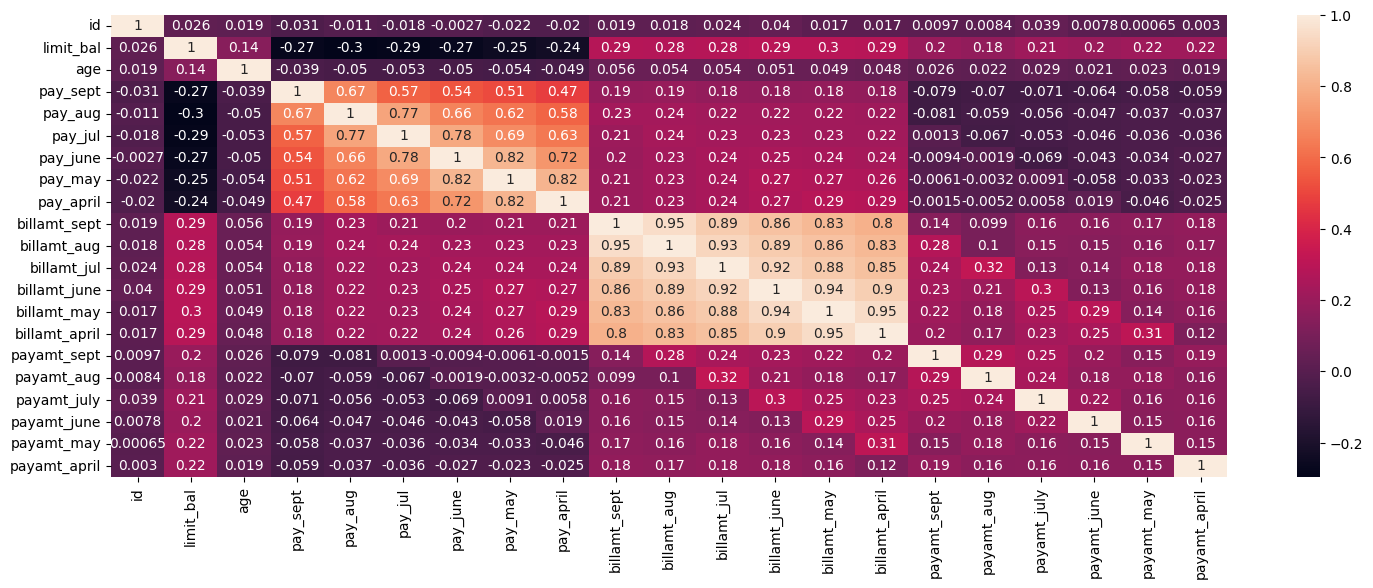

In [62]:
fig,ax = plt.subplots(figsize=(18,6))
sns.heatmap(df.corr(), annot= True)

In [63]:
print(bal_df['marriage'].unique())
print(bal_df['education'].unique())

[2 1 'others']
[1 2 3 'others']


In [64]:
# We are dropping the "others" values from the marriage and education columns to make
# our inputs for each column of the dataframe in a standard format.
bal_df.drop(bal_df.index[bal_df['marriage']=='others'], inplace = True)
bal_df.drop(bal_df.index[bal_df['education']=='others'], inplace = True)
print(bal_df['marriage'].unique())
print(bal_df['education'].unique())

[2 1]
[1 2 3]


In [65]:
# We copy the balanced dataframe to a new dataframe called dataset_copy
# This is the dataframe that we will use for modelling purposes.
dataset_copy = bal_df.copy()
dataset_copy.columns.nunique()

25

### 5. Data Splitting

##### What data splitting ratio have you used and why?

The data splitting ratio we are using is a 30%-70% split for test and train dataset. The reason we are using this ratio is because this split is very widely used in the industry and this split ensures there is enough data reserved for training dataset and the test dataset contains enough values for the model to predict on.

In [66]:
x = dataset_copy.drop(columns=['defaulter_status','id'], axis = 1)
y = dataset_copy['defaulter_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 8888)

### 6. Data Scaling

In [67]:
bal_df.head()

,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_jul,pay_june,...,billamt_june,billamt_may,billamt_april,defaulter_status,logpayamt_april,logpayamt_may,logpayamt_june,logpayamt_july,logpayamt_aug,logpayamt_sept
11,12,260000,2,1,2,51,-1,-1,-1,-1,...,8517,22287,13668,0,8.199739,0.000000,10.012387,9.057539,9.206935,9.990491
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,1,0.000000,5.755742,6.448889,0.000000,5.755742,5.755742
28,29,50000,2,3,1,47,-1,-1,-1,-1,...,2040,30430,257,0,0.000000,5.549076,10.323184,7.622664,8.137688,8.135933
30,31,230000,2,1,2,27,-1,-1,-1,-1,...,15339,14307,36923,0,0.000000,10.526534,9.568504,9.638154,9.494090,9.756726
48,49,380000,1,2,2,32,-1,-1,-1,-1,...,32018,11849,11873,0,9.018090,9.382191,9.380168,10.113627,9.624963,9.977667


In [68]:
# Scaling your data
min_max = MinMaxScaler()
x_train = min_max.fit_transform(x_train)
x_test = min_max.fit_transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4915, 23)
(4915,)
(2107, 23)
(2107,)


##### Which method have you used to scale you data and why?

We are using MinMaxScaler() to scale our data. It is a data normalization technique used in Machine Learning and data preprocessing. It scales and transforms features to a specified range, typically [0,1]. This normalization is particularly useful when working with algorithms that are sensitive to the scale of input features.

In [69]:
# We are dedfining a function named get_metrics() which will return us the key evaluation metrics :- precision, recall, AUC, F1 score and accuracy
# We will store append the values for these metrics for each model we use to a dataframe where after all the models have been run,
# we can compare the performances of all these models and select the appropriate model as per the priority and requirement.

def get_metrics(x, y, z, model):
  global cm, precision, recall, f1_score, accuracy
  cm = confusion_matrix(y_true = x,y_pred = y)
  cr = classification_report(x,y)
  crod = classification_report(x,y, output_dict = True)
  auc = roc_auc_score(x,y)
  precision = crod['macro avg']['precision']
  recall = crod['macro avg']['recall']
  f1_score = crod['macro avg']['f1-score']
  accuracy =crod['accuracy']
  print("The classification report generated is:-")
  print(cr)
  print("The area covered under curve is:-",round(auc,3))
  print("The recall value is:-", round(recall,3))
  print("The precision value is:-", round(precision,3))
  print("The f1-score is:-", round(f1_score,3))
  print("The accuracy is:- ",(accuracy*100),"%")
  metrics_values = {'Name': z, 'Precision':round(precision,3), 'Recall':round(recall,3), 'AUC':round(auc,3), "F1 score":round(f1_score, 3), "accuracy":accuracy}
  global results_df
  results_df = pd.DataFrame(metrics_values, index=[1])
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  disp.plot()
  plt.show()

## ***7. ML Model Implementation***

### ML Model - 1

In [70]:
# ML Model - 1 Implementation
log_reg = LogisticRegression(random_state = 4444)
# Fit the Algorithm
log_reg.fit(x_train, y_train)
# Predict on the model

LogisticRegression(random_state=4444)

In [71]:
incpt = log_reg.intercept_
coef = log_reg.coef_
coef = coef.transpose()
print("Intercept value is:-", incpt)
print("Coefficient Value:-", coef)

Intercept value is:- [1.79318808]
Coefficient Value:- [[-2.42304249]
 [-0.69721218]
 [-1.11893195]
 [-0.97603766]
 [-0.34666495]
 [ 3.58247247]
 [ 1.32095492]
 [-0.17820937]
 [-0.01750063]
 [ 0.75478904]
 [ 0.83140846]
 [ 0.6419912 ]
 [ 0.31136302]
 [ 0.02345672]
 [ 0.61411082]
 [ 0.81951827]
 [ 0.15245182]
 [ 0.32510153]
 [-0.21563895]
 [-0.67089471]
 [-0.59687936]
 [-0.27991316]
 [ 0.12358594]]


In [72]:
# For a better view of the Coefficient values for each column
pd.DataFrame(coef, x.columns, columns=['Coef value'])

,Coef value
limit_bal,-2.423042
sex,-0.697212
education,-1.118932
marriage,-0.976038
age,-0.346665
pay_sept,3.582472
pay_aug,1.320955
pay_jul,-0.178209
pay_june,-0.017501
pay_may,0.754789


In [73]:
log_reg.score(x_train, y_train)

0.7940996948118006

In [74]:
y_preds = log_reg.predict(x_test)
y_training_preds = log_reg.predict(x_train)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1774
           1       0.83      0.85      0.84      3141

    accuracy                           0.79      4915
   macro avg       0.78      0.77      0.78      4915
weighted avg       0.79      0.79      0.79      4915

The area covered under curve is:- 0.774
The recall value is:- 0.774
The precision value is:- 0.777
The f1-score is:- 0.775
The accuracy is:-  79.40996948118007 %


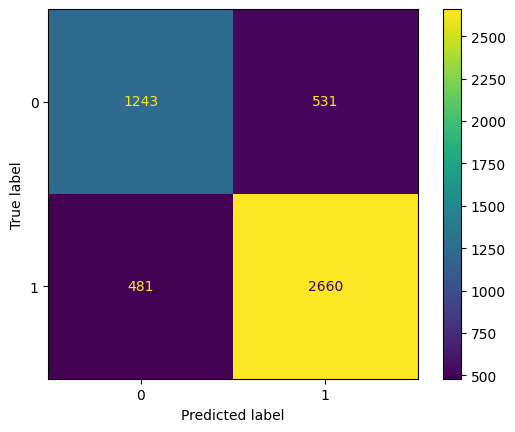

In [75]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds, 'Logistic Regression', log_reg)
training_df = results_df.copy()

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       793
           1       0.82      0.82      0.82      1314

    accuracy                           0.77      2107
   macro avg       0.76      0.76      0.76      2107
weighted avg       0.78      0.77      0.77      2107

The area covered under curve is:- 0.761
The recall value is:- 0.761
The precision value is:- 0.76
The f1-score is:- 0.761
The accuracy is:-  77.45609871855719 %


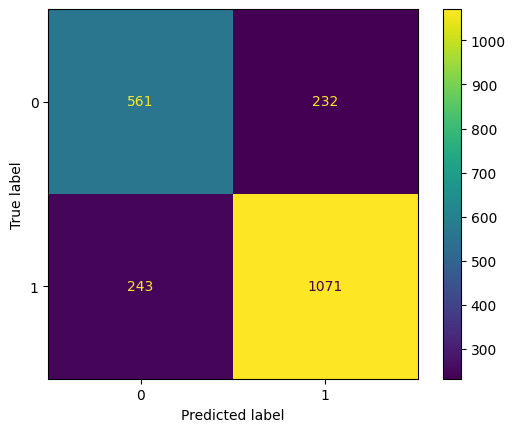

In [76]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "Logistic Regression", log_reg)
test_df = results_df.copy()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart
print("The first model we are using is Logistic Regression. The recall score is {}%,  precision is {}%, f1-score is {}%, accuracy is {}%.\nThe evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to \nminimize the number of defaulters who get wrongly classified as non-defaulters.".format(round(recall*100, 3), round(precision*100, 3),
                                                                                         round(f1_score*100, 3), round(accuracy*100,3)))

The first model we are using is Logistic Regression. The recall score is 76.125%,  precision is 75.986%, f1-score is 76.053%, accuracy is 77.456%.
The evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to 
minimize the number of defaulters who get wrongly classified as non-defaulters.


We can see from the above visualization of confusion matrix, we can see that our model correctly predicts around 1100-1200 of the defaulters in our test dataset and misclassifies around 174-274 of the defaulters as non-defaulters

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define grid search
model = LogisticRegression(max_iter=10000, random_state = 4444)
solvers = ['lbfgs']

#penalties = ['10', '12', '14', '16', '18', '20']
c_values = [100000, 90000, 80000, 70000, 60000, ]

# define grid search
grid = dict(solver=solvers,penalty = ['l2'], C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
print(grid)
grid_result=grid_search.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

{'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [100000, 90000, 80000, 70000, 60000]}
Best: 0.839691 using {'C': 100000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [79]:
log_opt = LogisticRegression(C = 100000, penalty ='l2', solver = 'lbfgs')
log_opt.fit(x_train, y_train)
y_train_preds = log_opt.predict(x_train)
y_preds = log_opt.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification report generated is:-
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1774
           1       0.83      0.85      0.84      3141

    accuracy                           0.79      4915
   macro avg       0.78      0.77      0.78      4915
weighted avg       0.79      0.79      0.79      4915

The area covered under curve is:- 0.774
The recall value is:- 0.774
The precision value is:- 0.777
The f1-score is:- 0.776
The accuracy is:-  79.43031536113936 %


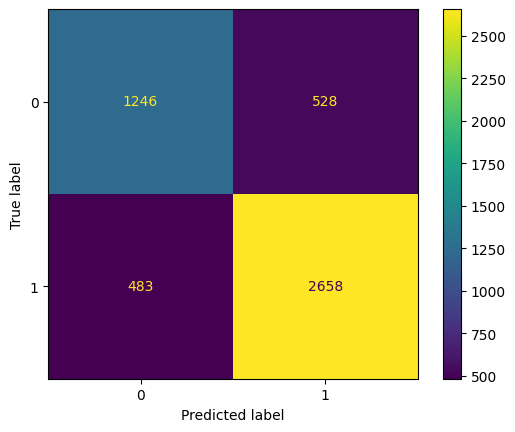

<ipython-input-80-cc37c1d9efef>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index = True)


In [80]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_train_preds, 'Log Reg cv', log_opt)
training_df = training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.76      0.44      0.56       793
           1       0.73      0.92      0.81      1314

    accuracy                           0.74      2107
   macro avg       0.75      0.68      0.69      2107
weighted avg       0.74      0.74      0.72      2107

The area covered under curve is:- 0.678
The recall value is:- 0.678
The precision value is:- 0.747
The f1-score is:- 0.685
The accuracy is:-  73.75415282392026 %


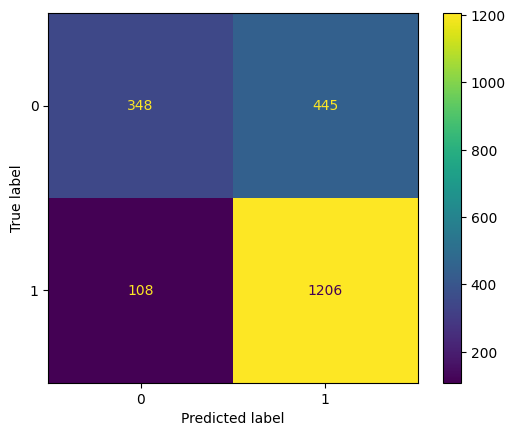

<ipython-input-81-be133f8aa479>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [81]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, 'Log Reg cv', log_opt)
test_df = test_df.append(results_df, ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above confusion matrix, we can see that the Logistic Regression model after hyperparameter optimization, we are getting better results at predicting the true label of non-defaulters. But as for the metrics we have set to evaluate the model on our test data, we can see that this model is relatively not performing better in case of predicting the labels for the actual defaulters. So, this model is not of much use to us.

### ML Model - 2

In [82]:
rf = RandomForestClassifier(random_state = 4444)
rf.fit(x_train, y_train)
y_train_preds = rf.predict(x_train)
y_pred = rf.predict(x_test)

The classification report generated is:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1774
           1       1.00      1.00      1.00      3141

    accuracy                           1.00      4915
   macro avg       1.00      1.00      1.00      4915
weighted avg       1.00      1.00      1.00      4915

The area covered under curve is:- 1.0
The recall value is:- 1.0
The precision value is:- 1.0
The f1-score is:- 1.0
The accuracy is:-  99.97965412004069 %


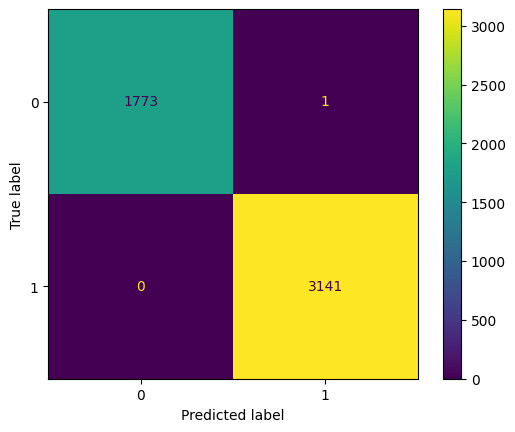

<ipython-input-83-185cfa842acd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index = True)


In [83]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_train_preds,'Random Forest Classifier', rf)
training_df = training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       793
           1       0.79      0.86      0.82      1314

    accuracy                           0.77      2107
   macro avg       0.76      0.74      0.75      2107
weighted avg       0.77      0.77      0.77      2107

The area covered under curve is:- 0.741
The recall value is:- 0.741
The precision value is:- 0.759
The f1-score is:- 0.747
The accuracy is:-  77.02895111532986 %


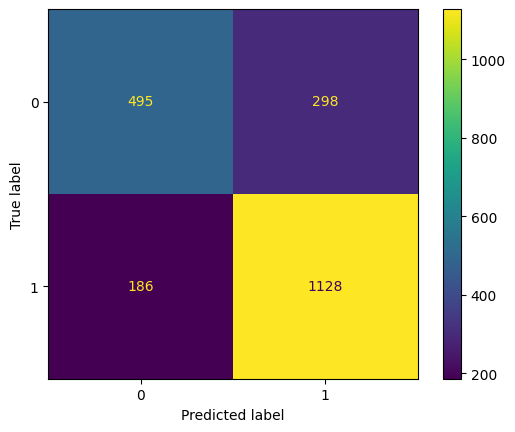

<ipython-input-84-5f573691ec15>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [84]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_pred, 'Random Forest Classifier', rf)
test_df = test_df.append(results_df, ignore_index = True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Visualizing evaluation Metric Score chart
print("The next model we are using is Random Forest Classifier. The recall score is {}%,  precision is {}%, f1-score is {}%, accuracy is {}%.\nThe evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to \nminimize the number of defaulters who get wrongly classified as non-defaulters.".format(round(recall*100, 3), round(precision*100, 3),
                                                                                         round(f1_score*100, 3), round(accuracy*100,3)))

The next model we are using is Random Forest Classifier. The recall score is 74.133%,  precision is 75.895%, f1-score is 74.75%, accuracy is 77.029%.
The evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to 
minimize the number of defaulters who get wrongly classified as non-defaulters.


We can see from the above visualization of confusion matrix, we can see that our model correctly predicts around 1050-1250 of the defaulters in our test dataset and misclassifies around 149-349 of the defaulters as non-defaulters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#played with many values of params()
n_estimators = [100]
max_depth = [10]
min_samples_split = [14]
min_samples_leaf = [9]
# Fit the Algorithm
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# Predict on the model
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')
rf_grid.fit(x_train, y_train)
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.8s
Best: 0.857999 using {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 14, 'n_estimators': 100}


In [87]:
rf_opt=RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 14, min_samples_leaf = 9)

In [88]:
# Fit the Algorithm
rf_opt.fit(x_train, y_train)

# Predict on the model
y_preds = rf_opt.predict(x_test)
y_training_preds = rf_opt.predict(x_train)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1774
           1       0.89      0.89      0.89      3141

    accuracy                           0.86      4915
   macro avg       0.85      0.85      0.85      4915
weighted avg       0.86      0.86      0.86      4915

The area covered under curve is:- 0.852
The recall value is:- 0.852
The precision value is:- 0.852
The f1-score is:- 0.852
The accuracy is:-  86.34791454730417 %


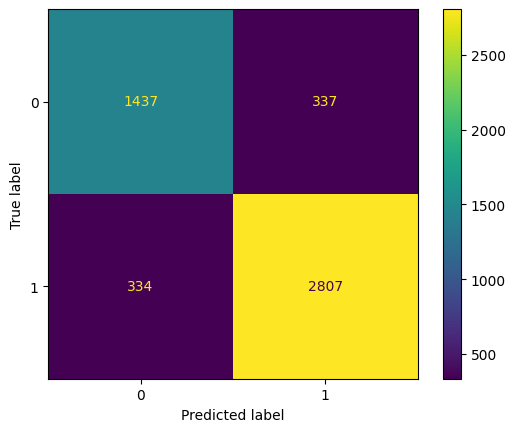

<ipython-input-89-cb0eb5439abf>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index = True)


In [89]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds, "RCF CV", rf_opt)
training_df = training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       793
           1       0.79      0.88      0.83      1314

    accuracy                           0.78      2107
   macro avg       0.77      0.75      0.76      2107
weighted avg       0.78      0.78      0.78      2107

The area covered under curve is:- 0.749
The recall value is:- 0.749
The precision value is:- 0.774
The f1-score is:- 0.757
The accuracy is:-  78.12055054579972 %


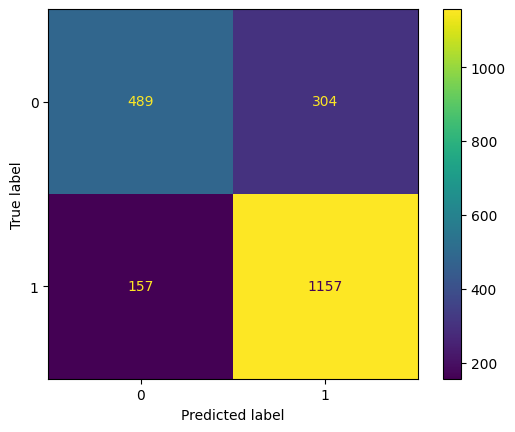

<ipython-input-90-9b3ee25979cc>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [90]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "RCF CV", rf_opt)
test_df = test_df.append(results_df, ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above confusion matrix, we can see that the Random Forest Classifier model after hyperparameter optimization, we are getting better results at predicting the true label of non-defaulters. But as for the metrics we have set to evaluate the model on our test data, we can see that this model is actually performing worse in case of predicting the labels for the actual defaulters. So, this model is not of much use to us.

### ML Model - 3

In [91]:
# ML Model - 3 Implementation
xgb = XGBClassifier(random_state = 4444)

# Fit the Algorithm
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=4444, ...)

In [92]:
# Predict on the model
y_preds = xgb.predict(x_test)
y_training_preds = xgb.predict(x_train)

The classification report generated is:-
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1774
           1       1.00      1.00      1.00      3141

    accuracy                           1.00      4915
   macro avg       1.00      1.00      1.00      4915
weighted avg       1.00      1.00      1.00      4915

The area covered under curve is:- 0.997
The recall value is:- 0.997
The precision value is:- 0.997
The f1-score is:- 0.997
The accuracy is:-  99.71515768056969 %


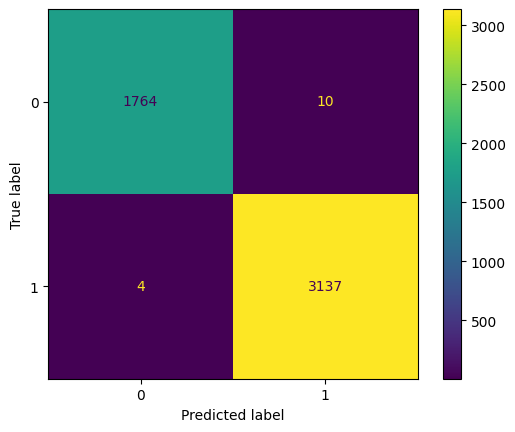

<ipython-input-93-1542e0720254>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index=True)


In [93]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds, "XGBClassifier", xgb)
training_df = training_df.append(results_df, ignore_index=True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       793
           1       0.80      0.84      0.82      1314

    accuracy                           0.76      2107
   macro avg       0.75      0.74      0.74      2107
weighted avg       0.76      0.76      0.76      2107

The area covered under curve is:- 0.74
The recall value is:- 0.74
The precision value is:- 0.751
The f1-score is:- 0.744
The accuracy is:-  76.4594209776934 %


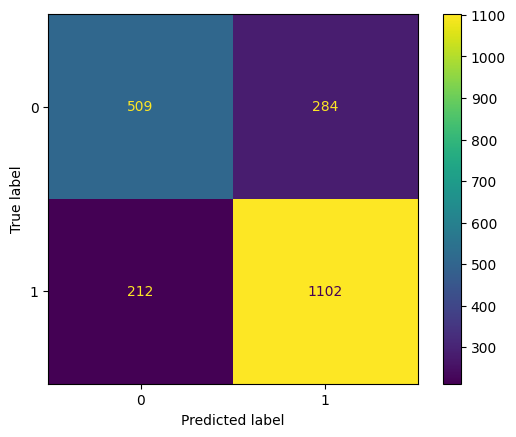

<ipython-input-94-50f2ca12a279>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [94]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "XGBClassifier", xgb)
test_df = test_df.append(results_df, ignore_index = True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
print("The next model we are using is XGBClassifier. The recall score is {}%,  precision is {}%, f1-score is {}%, accuracy is {}%.\nThe evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to \nminimize the number of defaulters who get wrongly classified as non-defaulters.".format(round(recall*100, 3), round(precision*100, 3),
                                                                                         round(f1_score*100, 3), round(accuracy*100,3)))


The next model we are using is XGBClassifier. The recall score is 74.026%,  precision is 75.053%, f1-score is 74.434%, accuracy is 76.459%.
The evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to 
minimize the number of defaulters who get wrongly classified as non-defaulters.


We can see from the above visualization of confusion matrix, we can see that our model correctly predicts around 1150-1400 of the defaulters in our test dataset and misclassifies around 40-240 of the defaulters as non-defaulters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
n_estimators = [80]
max_depth = [8]
min_samples_split = [30]
min_samples_leaf = [0, 1]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Fit the Algorithm
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
xgb_grid.fit(x_train,y_train)

# Predict on the model
y_preds = xgb.predict(x_test)
y_train_preds = xgb_grid.predict(x_train)
print("Best: %f using %s" % (xgb_grid.best_score_, xgb_grid.best_params_))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=8, min_samples_leaf=0, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=0, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=0, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=0, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=0, min_samples_split=30, n_estimators=80; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=30, n_estimators=80; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=30, n_estimators=80; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:26:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best: 0.906083 using {'max_depth': 8, 'min_samples_leaf': 0, 'min_samples_split': 30, 'n_estimators': 80}


In [97]:
# ML Model - 3 Implementation
xgb_opt = XGBClassifier(n_estimators = 80, max_depth = 8, min_samples_split= 30, min_samples_leaf= 0)

# Fit the Algorithm
xgb_opt.fit(x_train,y_train)

# Predict on the model
y_training_preds = xgb_opt.predict(x_train)
y_preds = xgb_opt.predict(x_test)

The classification report generated is:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1774
           1       1.00      1.00      1.00      3141

    accuracy                           1.00      4915
   macro avg       1.00      1.00      1.00      4915
weighted avg       1.00      1.00      1.00      4915

The area covered under curve is:- 0.999
The recall value is:- 0.999
The precision value is:- 0.999
The f1-score is:- 0.999
The accuracy is:-  99.91861648016277 %


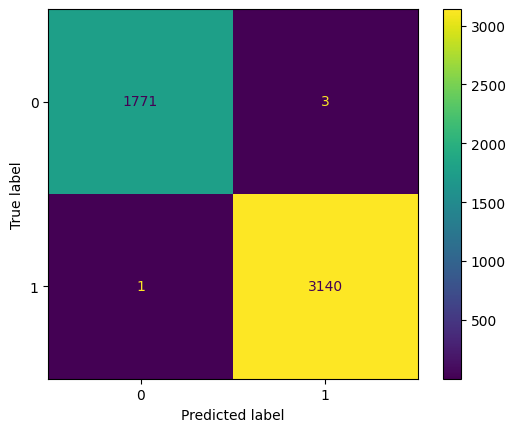

<ipython-input-98-ff52d9b79055>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index = True)


In [98]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds, "XGB CV", xgb_opt)
training_df = training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.72      0.59      0.64       793
           1       0.78      0.86      0.82      1314

    accuracy                           0.76      2107
   macro avg       0.75      0.72      0.73      2107
weighted avg       0.75      0.76      0.75      2107

The area covered under curve is:- 0.723
The recall value is:- 0.723
The precision value is:- 0.746
The f1-score is:- 0.73
The accuracy is:-  75.7000474608448 %


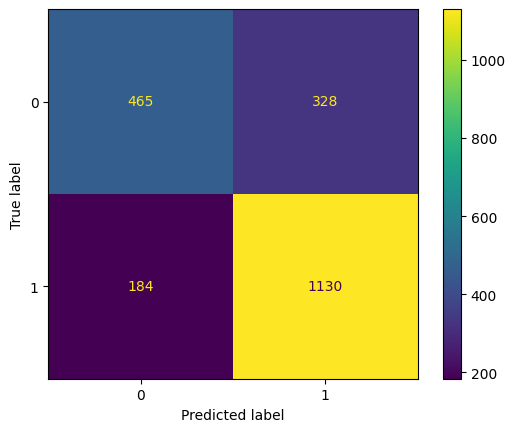

<ipython-input-99-5d3846b47628>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [99]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "XGB CV", xgb_opt)
test_df = test_df.append(results_df, ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above confusion matrix, we can see that the XGBClassifier model after hyperparameter optimization, we are getting better results at predicting the true label of non-defaulters. But as for the metrics we have set to evaluate the model on our test data, we can see that this model is actually performing worse in case of predicting the labels for the actual defaulters. So, this model is not of much use to us.

### ML Model - 4

In [100]:
gbc = GradientBoostingClassifier(random_state = 4444)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=4444)

In [101]:
y_training_preds = gbc.predict(x_train)
y_preds = gbc.predict(x_test)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1774
           1       0.88      0.89      0.89      3141

    accuracy                           0.85      4915
   macro avg       0.84      0.84      0.84      4915
weighted avg       0.85      0.85      0.85      4915

The area covered under curve is:- 0.841
The recall value is:- 0.841
The precision value is:- 0.842
The f1-score is:- 0.841
The accuracy is:-  85.37131230925738 %


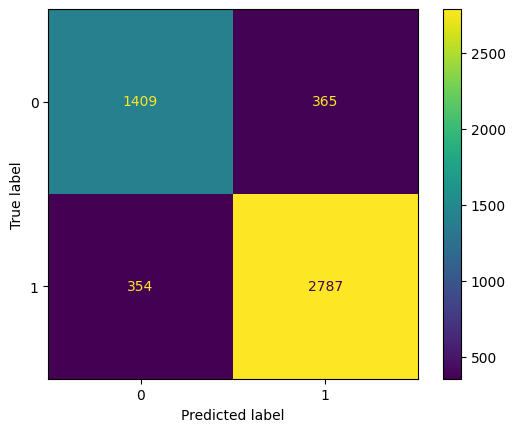

<ipython-input-102-6a05a8a3ee54>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index = True)


In [102]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds,"GBC", gbc)
training_df = training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.83      0.14      0.24       793
           1       0.65      0.98      0.79      1314

    accuracy                           0.67      2107
   macro avg       0.74      0.56      0.51      2107
weighted avg       0.72      0.67      0.58      2107

The area covered under curve is:- 0.562
The recall value is:- 0.562
The precision value is:- 0.743
The f1-score is:- 0.515
The accuracy is:-  66.63502610346464 %


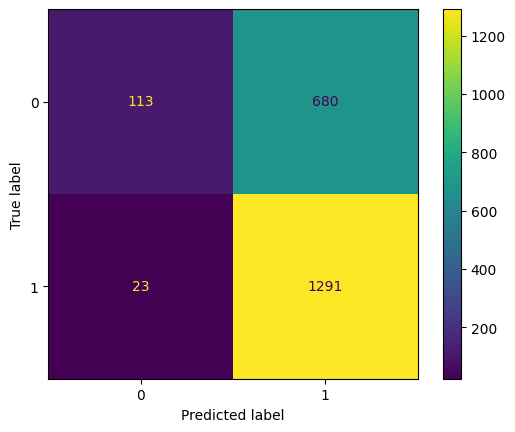

<ipython-input-103-7c5e1d756879>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [103]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "GBC", gbc)
test_df = test_df.append(results_df, ignore_index = True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [104]:
# Visualizing evaluation Metric Score chart
print("The first model we are using is Gradient Boosting Classifier. The recall score is {}%,  precision is {}%, f1-score is {}%, accuracy is {}%.\nThe evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to \nminimize the number of defaulters who get wrongly classified as non-defaulters.".format(round(recall*100, 3), round(precision*100, 3),
                                                                                         round(f1_score*100, 3), round(accuracy*100,3)))


The first model we are using is Gradient Boosting Classifier. The recall score is 56.25%,  precision is 74.294%, f1-score is 51.463%, accuracy is 66.635%.
The evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to 
minimize the number of defaulters who get wrongly classified as non-defaulters.


We can see from the above visualization of confusion matrix, we can see that our model correctly predicts around 1150-1380 of the defaulters in our test dataset and misclassifies around 20-230 of the defaulters as non-defaulters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
parameters = {"n_estimators":[230],"max_depth":[8],"learning_rate":[0.45, 0.5]}
gbc_grid = GridSearchCV(estimator = gbc, param_grid = parameters, cv=3, verbose = 2)
gbc_grid.fit(x_train, y_train)
print("Best: %f using %s" % (gbc_grid.best_score_, gbc_grid.best_params_))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..learning_rate=0.45, max_depth=8, n_estimators=230; total time=  10.5s
[CV] END ..learning_rate=0.45, max_depth=8, n_estimators=230; total time=   9.9s
[CV] END ..learning_rate=0.45, max_depth=8, n_estimators=230; total time=  11.2s
[CV] END ...learning_rate=0.5, max_depth=8, n_estimators=230; total time=  13.6s
[CV] END ...learning_rate=0.5, max_depth=8, n_estimators=230; total time=  18.6s
[CV] END ...learning_rate=0.5, max_depth=8, n_estimators=230; total time=  12.3s
Best: 0.826652 using {'learning_rate': 0.45, 'max_depth': 8, 'n_estimators': 230}


In [106]:
gbc_opt = GradientBoostingClassifier(learning_rate = 0.55, max_depth = 8, n_estimators = 230)
gbc_opt.fit(x_train,y_train)
y_training_preds = gbc_opt.predict(x_train)
y_preds = gbc_opt.predict(x_test)

The classification report generated is:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1774
           1       1.00      1.00      1.00      3141

    accuracy                           1.00      4915
   macro avg       1.00      1.00      1.00      4915
weighted avg       1.00      1.00      1.00      4915

The area covered under curve is:- 1.0
The recall value is:- 1.0
The precision value is:- 1.0
The f1-score is:- 1.0
The accuracy is:-  99.97965412004069 %


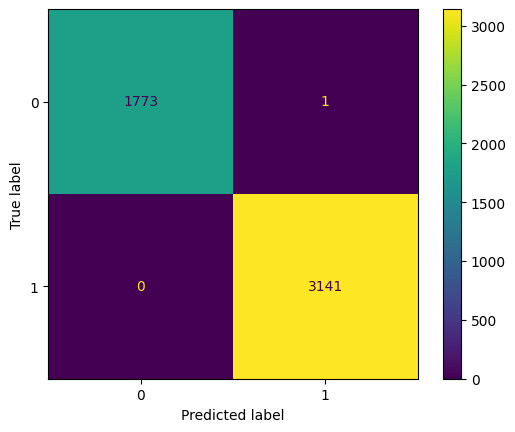

<ipython-input-107-2253faa95eea>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index = True)


In [107]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds,"gbc cv", gbc_opt)
training_df = training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.73      0.46      0.57       793
           1       0.73      0.90      0.81      1314

    accuracy                           0.73      2107
   macro avg       0.73      0.68      0.69      2107
weighted avg       0.73      0.73      0.72      2107

The area covered under curve is:- 0.681
The recall value is:- 0.681
The precision value is:- 0.734
The f1-score is:- 0.688
The accuracy is:-  73.46938775510205 %


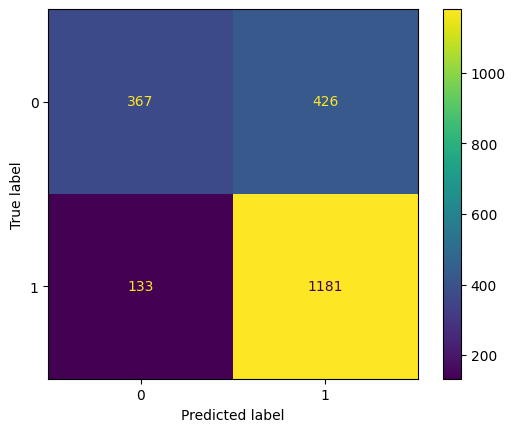

<ipython-input-108-ef6c470d2e75>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [108]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "gbc cv", gbc_opt)
test_df = test_df.append(results_df, ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above confusion matrix, we can see that the Gradient Boosting Classifier model after hyperparameter optimization, we are getting better results at predicting the true label of non-defaulters. But as for the metrics we have set to evaluate the model on our test data, we can see that this model is actually performing worse in case of predicting the labels for the actual defaulters. So, this model is not of much use to us.

### ML Model - 5

In [109]:
svc_classifier = SVC(kernel='rbf', random_state = 4444)
svc_classifier.fit(x_train, y_train)

SVC(random_state=4444)

In [110]:
y_training_preds = svc_classifier.predict(x_train)
y_preds = svc_classifier.predict(x_test)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1774
           1       0.87      0.85      0.86      3141

    accuracy                           0.82      4915
   macro avg       0.81      0.82      0.81      4915
weighted avg       0.83      0.82      0.83      4915

The area covered under curve is:- 0.816
The recall value is:- 0.816
The precision value is:- 0.809
The f1-score is:- 0.812
The accuracy is:-  82.48219735503561 %


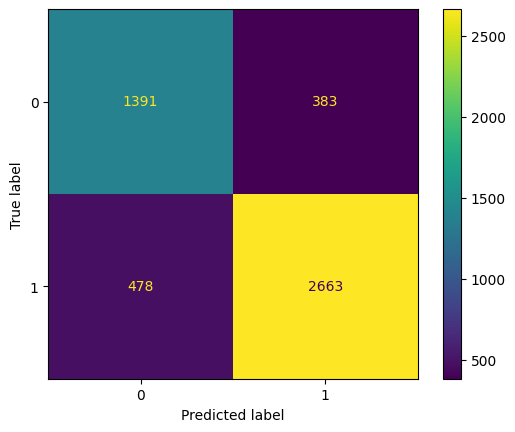

<ipython-input-111-20119d4ccf97>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df= training_df.append(results_df, ignore_index = True)


In [111]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds,"SVC", svc_classifier)
training_df= training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       793
           1       0.86      0.79      0.83      1314

    accuracy                           0.79      2107
   macro avg       0.78      0.79      0.78      2107
weighted avg       0.80      0.79      0.79      2107

The area covered under curve is:- 0.792
The recall value is:- 0.792
The precision value is:- 0.78
The f1-score is:- 0.784
The accuracy is:-  79.16468913146653 %


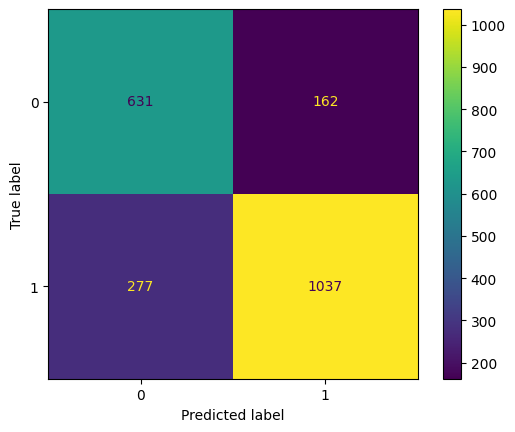

<ipython-input-112-7c461edac6fb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [112]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "SVC",svc_classifier)
test_df = test_df.append(results_df, ignore_index = True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [113]:
# Visualizing evaluation Metric Score chart
print("The next model we are using is Support Vector Machine. The recall score is {}%,  precision is {}%, f1-score is {}%, accuracy is {}%.\nThe evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to \nminimize the number of defaulters who get wrongly classified as non-defaulters.".format(round(recall*100, 3), round(precision*100, 3),
                                                                                         round(f1_score*100, 3), round(accuracy*100,3)))


The next model we are using is Support Vector Machine. The recall score is 79.245%,  precision is 77.991%, f1-score is 78.361%, accuracy is 79.165%.
The evaluation metric i am using for choosing the model is the lower row of the confusion matrix. This is because we have to 
minimize the number of defaulters who get wrongly classified as non-defaulters.


We can see from the above visualization of confusion matrix, we can see that our model correctly predicts around 1000-1200 of the defaulters in our test dataset and misclassifies around 175-375  of the defaulters as non-defaulters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [114]:
param_grid= {'C': [12, 13, 14],
              'gamma': [0.18, 0.20, 0.22],
              'kernel': ['rbf']}
svm_grid = GridSearchCV(svc_classifier, param_grid, refit = True, cv=2, verbose =2, scoring="roc_auc")
svm_grid.fit(x_train, y_train)
print("Best: %f using %s" % (svm_grid.best_score_, svm_grid.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .......................C=12, gamma=0.18, kernel=rbf; total time=   0.5s
[CV] END .......................C=12, gamma=0.18, kernel=rbf; total time=   0.4s
[CV] END ........................C=12, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END ........................C=12, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .......................C=12, gamma=0.22, kernel=rbf; total time=   0.4s
[CV] END .......................C=12, gamma=0.22, kernel=rbf; total time=   0.4s
[CV] END .......................C=13, gamma=0.18, kernel=rbf; total time=   0.4s
[CV] END .......................C=13, gamma=0.18, kernel=rbf; total time=   0.4s
[CV] END ........................C=13, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END ........................C=13, gamma=0.2, kernel=rbf; total time=   0.4s
[CV] END .......................C=13, gamma=0.22, kernel=rbf; total time=   0.4s
[CV] END .......................C=13, gamma=0.22,

In [115]:
svc_opt=SVC(C = 14, gamma = 0.2, kernel = 'rbf')
svc_opt.fit(x_train, y_train)
y_training_preds = svc_opt.predict(x_train)
y_preds = svc_opt.predict(x_test)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1774
           1       0.88      0.86      0.87      3141

    accuracy                           0.83      4915
   macro avg       0.82      0.82      0.82      4915
weighted avg       0.84      0.83      0.83      4915

The area covered under curve is:- 0.825
The recall value is:- 0.825
The precision value is:- 0.819
The f1-score is:- 0.821
The accuracy is:-  83.37741607324517 %


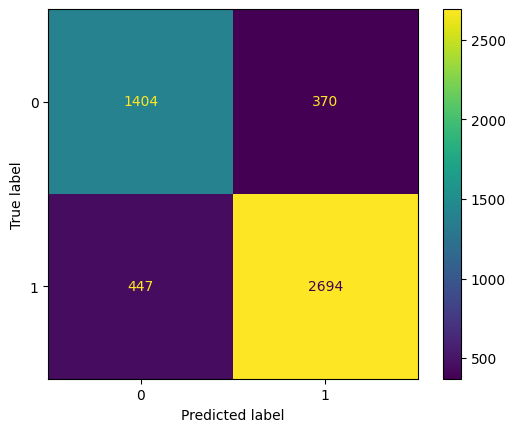

<ipython-input-116-3a589b3c6b37>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(results_df, ignore_index = True)


In [116]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_train, y_training_preds, "SVC CV", svc_opt)
training_df = training_df.append(results_df, ignore_index = True)

The classification report generated is:-
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       793
           1       0.87      0.78      0.82      1314

    accuracy                           0.79      2107
   macro avg       0.78      0.79      0.78      2107
weighted avg       0.80      0.79      0.79      2107

The area covered under curve is:- 0.791
The recall value is:- 0.791
The precision value is:- 0.777
The f1-score is:- 0.78
The accuracy is:-  78.7375415282392 %


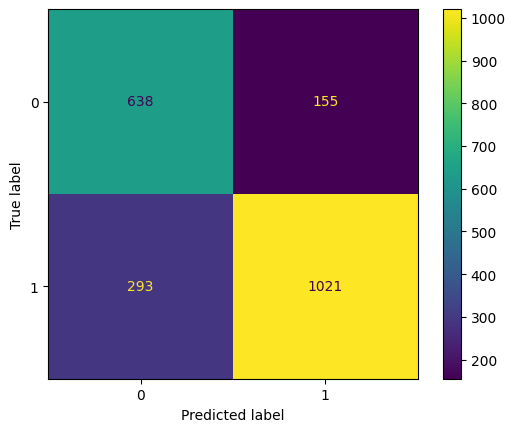

<ipython-input-117-6039dfd01b76>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(results_df, ignore_index = True)


In [117]:
# Using the get_metrics() function to get the confusion
# matrix and the evaluation metrics

get_metrics(y_test, y_preds, "SVC CV", svc_opt)
test_df = test_df.append(results_df, ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above confusion matrix, we can see that the Support Vector Machine model after hyperparameter optimization, we are getting better results at predicting the true label of non-defaulters. But as for the metrics we have set to evaluate the model on our test data, we can see that this model is actually performing worse in case of predicting the labels for the actual defaulters. So, this model is not of much use to us.

In [118]:
final_results = pd.concat([training_df, test_df],keys = ['Training Set', 'Test Set'])

In [119]:
final_results

Name  Precision  Recall    AUC  F1 score  \
Training Set 0       Logistic Regression      0.777   0.774  0.774     0.775   
             1                Log Reg cv      0.777   0.774  0.774     0.776   
             2  Random Forest Classifier      1.000   1.000  1.000     1.000   
             3                    RCF CV      0.852   0.852  0.852     0.852   
             4             XGBClassifier      0.997   0.997  0.997     0.997   
             5                    XGB CV      0.999   0.999  0.999     0.999   
             6                       GBC      0.842   0.841  0.841     0.841   
             7                    gbc cv      1.000   1.000  1.000     1.000   
             8                       SVC      0.809   0.816  0.816     0.812   
             9                    SVC CV      0.819   0.825  0.825     0.821   
Test Set     0       Logistic Regression      0.760   0.761  0.761     0.761   
             1                Log Reg cv      0.747   0.678  0.678     0.685   
             2  Random Forest Classifier      0.759   0.741  0.741     0.747   
             3                    RCF CV      0.774   0.749  0.749     0.757   
             4             XGBClassifier      0.751   0.740  0.740     0.744   
             5                    XGB CV      0.746   0.723  0.723     0.730   
             6                       GBC      0.743   0.562  0.562     0.515   
             7                    gbc cv      0.734   0.681  0.681     0.688   
             8                       SVC      0.780   0.792  0.792     0.784   
             9                    SVC CV      0.777   0.791  0.791     0.780   

                accuracy  
Training Set 0  0.794100  
             1  0.794303  
             2  0.999797  
             3  0.863479  
             4  0.997152  
             5  0.999186  
             6  0.853713  
             7  0.999797  
             8  0.824822  
             9  0.833774  
Test Set     0  0.774561  
             1  0.737542  
             2  0.770290  
             3  0.781206  
             4  0.764594  
             5  0.757000  
             6  0.666350  
             7  0.734694  
             8  0.791647  
             9  0.787375

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The classification metric we are considering here, is the confusion matrix (specifically the actual and predicted results of defaulter status being 1(the person will default on his/her payments)). This is because we need to focus only on the model predictions for the actual label 1 (people who defaulted on their payments).

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose the Gradient Boosting Classifier model (without hyperparameter tuning) for our final predictions. The logic behind this decision is that our priority for the project is to identify the maximum number of true defaulters, and on the test data, GBC gave 30-80 wrong predictions for true defaulters(i.e. the model predicted the people to be non-defaulters when they were actually defaulters)and correctly predicted around 1270-1320 defaulters, that is an accuracy of around 94%-98% which is the maximum as compared to all the other models. We can set aside the accuracy score here because our aim is to identify the maximum number of true defaulters.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [120]:
dataset_copy.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_april',
       'billamt_sept', 'billamt_aug', 'billamt_jul', 'billamt_june',
       'billamt_may', 'billamt_april', 'defaulter_status', 'logpayamt_april',
       'logpayamt_may', 'logpayamt_june', 'logpayamt_july', 'logpayamt_aug',
       'logpayamt_sept'],
      dtype='object')

In [121]:
X_test = pd.DataFrame(x_test, columns=['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_april',
       'billamt_sept', 'billamt_aug', 'billamt_jul', 'billamt_june',
       'billamt_may', 'billamt_april', 'logpayamt_april',
       'logpayamt_may', 'logpayamt_june', 'logpayamt_july', 'logpayamt_aug',
       'logpayamt_sept'])

X_train = pd.DataFrame(x_train, columns=['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_jul', 'pay_june', 'pay_may', 'pay_april',
       'billamt_sept', 'billamt_aug', 'billamt_jul', 'billamt_june',
       'billamt_may', 'billamt_april', 'logpayamt_april',
       'logpayamt_may', 'logpayamt_june', 'logpayamt_july', 'logpayamt_aug',
       'logpayamt_sept'])

In [122]:
Y_train = pd.DataFrame(y_train, columns=["defaulter_status"])
Y_test  = pd.DataFrame(y_test, columns =["defaulter_status"])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 0, 'Relative Importance')

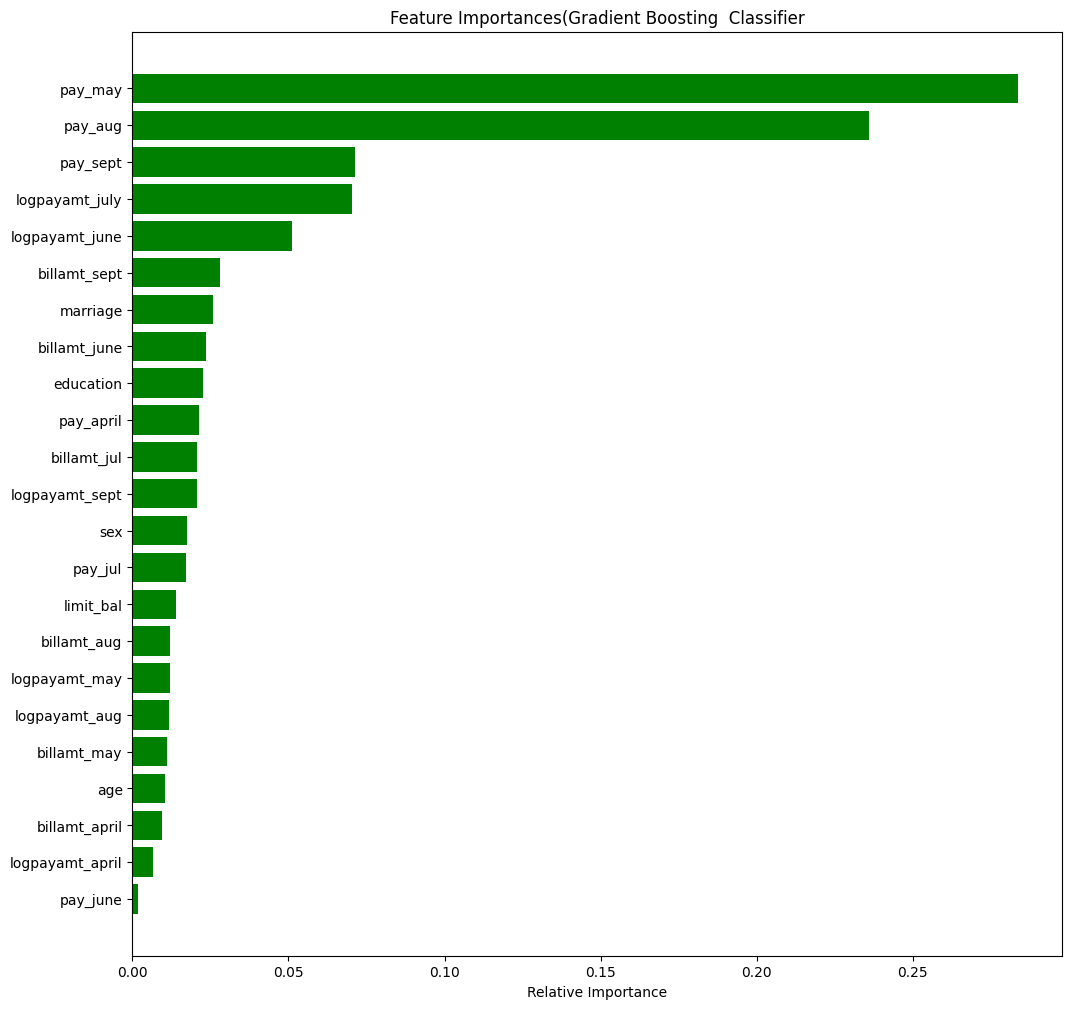

In [123]:
# Case 1 :-
gbc=GradientBoostingClassifier(random_state =  4444)
gbc.fit(X_train, Y_train)
importances = gbc.feature_importances_
imp_var = x.columns
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances(Gradient Boosting  Classifier')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_var[indices])
plt.xlabel('Relative Importance')

In [124]:
# Case 2 :-
svc_opt=SVC(C = 12, gamma = 0.18, kernel = 'rbf')
svc_opt.fit(X_train, Y_train)
y_training_preds = svc_opt.predict(X_train)
y_preds = svc_opt.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<ipython-input-125-b6a91595c636>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_opt.fit(X_train, Y_train)


Text(0.5, 0, 'Relative Importance')

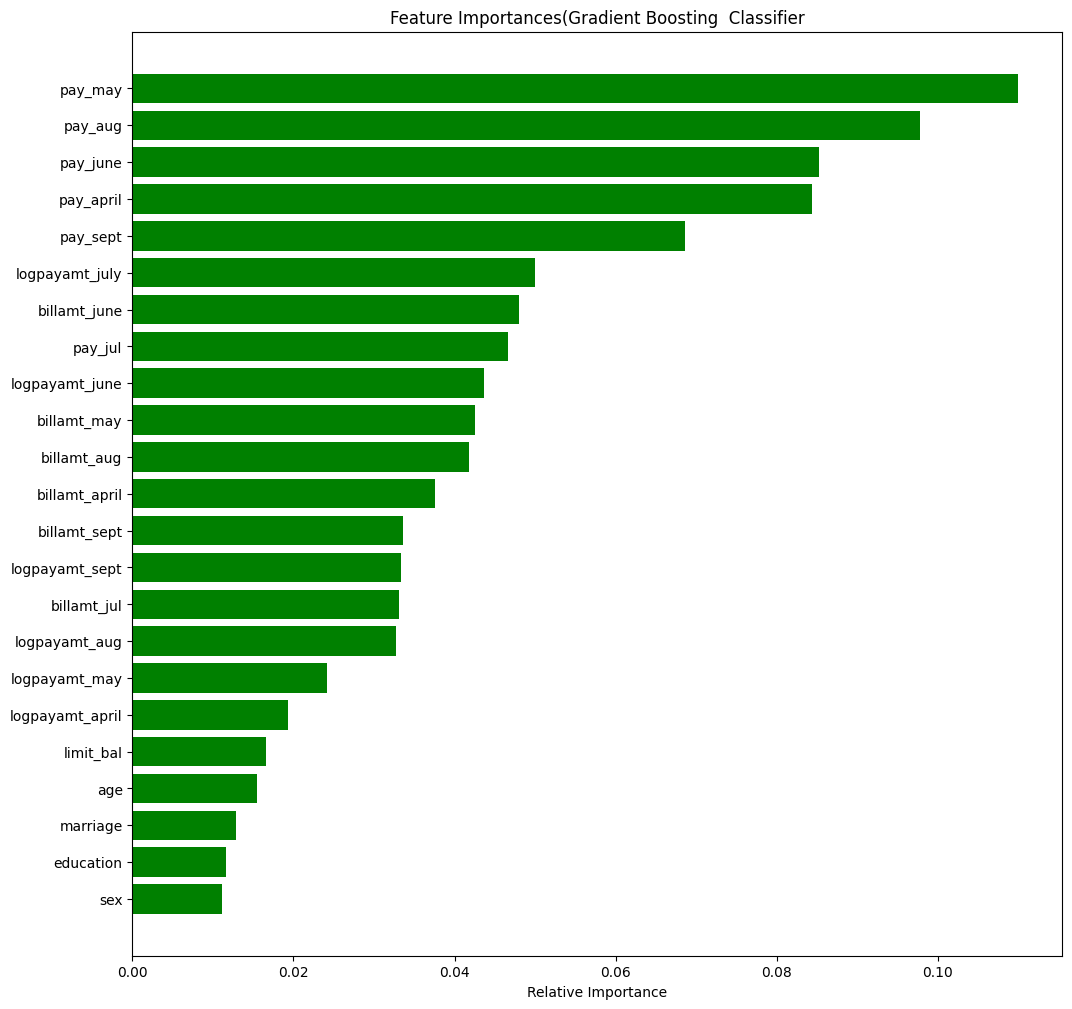

In [125]:
rf_opt=RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 14, min_samples_leaf = 9)
rf_opt.fit(X_train, Y_train)
y_training_preds = rf_opt.predict(X_train)
y_preds = rf_opt.predict(X_test)
importances = rf_opt.feature_importances_
imp_var = x.columns
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances(Gradient Boosting  Classifier')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_var[indices])
plt.xlabel('Relative Importance')

# **Conclusion**

In [126]:
final_results

Name  Precision  Recall    AUC  F1 score  \
Training Set 0       Logistic Regression      0.777   0.774  0.774     0.775   
             1                Log Reg cv      0.777   0.774  0.774     0.776   
             2  Random Forest Classifier      1.000   1.000  1.000     1.000   
             3                    RCF CV      0.852   0.852  0.852     0.852   
             4             XGBClassifier      0.997   0.997  0.997     0.997   
             5                    XGB CV      0.999   0.999  0.999     0.999   
             6                       GBC      0.842   0.841  0.841     0.841   
             7                    gbc cv      1.000   1.000  1.000     1.000   
             8                       SVC      0.809   0.816  0.816     0.812   
             9                    SVC CV      0.819   0.825  0.825     0.821   
Test Set     0       Logistic Regression      0.760   0.761  0.761     0.761   
             1                Log Reg cv      0.747   0.678  0.678     0.685   
             2  Random Forest Classifier      0.759   0.741  0.741     0.747   
             3                    RCF CV      0.774   0.749  0.749     0.757   
             4             XGBClassifier      0.751   0.740  0.740     0.744   
             5                    XGB CV      0.746   0.723  0.723     0.730   
             6                       GBC      0.743   0.562  0.562     0.515   
             7                    gbc cv      0.734   0.681  0.681     0.688   
             8                       SVC      0.780   0.792  0.792     0.784   
             9                    SVC CV      0.777   0.791  0.791     0.780   

                accuracy  
Training Set 0  0.794100  
             1  0.794303  
             2  0.999797  
             3  0.863479  
             4  0.997152  
             5  0.999186  
             6  0.853713  
             7  0.999797  
             8  0.824822  
             9  0.833774  
Test Set     0  0.774561  
             1  0.737542  
             2  0.770290  
             3  0.781206  
             4  0.764594  
             5  0.757000  
             6  0.666350  
             7  0.734694  
             8  0.791647  
             9  0.787375

Based on the results we got from our models, we can expect 3 situations to arise which can be sorted according to the priority of the credit card issuing authority:-

1.   If the priority of the bank is to reduce the number of defaulters as much as they can and they don't mind that non-defaulters may also be marked as defaulters, we recommend them to use the **Gradient Boosting Classifier** as it was able to classify around 98% of the defaulters correctly. This case is applicble to the smaller banks who have a smaller customer base and cannot afford the financial losses caused by the defaulters. For cases, where non-defaulters are marked as defaulters, the banks usually have dedicated customer care employess who help the customers who are facing inconvenience.

2.   If the priority of the bank is to reduce the number of non-defaulters marked as defaulters and in the process, they don't mind some defaulters getting marked as non-defaulters, we recommend them to use the **Hyper-parameter tuned Support Vector Machine Classifier** as the model was the most effective one in classifying non-defaulters as non-defautlers and has the least number of cases of False positives. This is particularly applicable to Global Banks as they have a huge customer base  and innocent customers getting marked as defaulters will hamper the user experience of the customers, bring a bad reputation to the banks and in some cases, the customers may migrate their accounts to a competitor which will further cause losses to the banks.

3.   If the priority of the bank is to have a more balanced approach towards false positives and false negatives i.e. defaulters being marked as non-defaulters and vice versa, we recommend them to use the **Hyperparameter tuned Random Forest Classifier model** as it was able to strike a balance between the number of False positives and False negatives. This case is applicable to mid-size to national level banks which usually will prefer that they catch the maximum defaulters at hand and at the same time want that non-defaulters are not marked as defaulters.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***